<h3>Prediction of game popularity using Machine Learning
(การทำนายความนิยมของเกมด้วย Machine Learning)</h3>

# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import re
import pickle

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CP499_INDIVIDUAL_COMPUTER_PROJECT_II/data/steam.csv', encoding="utf-8")

In [ ]:
# Function for split data
def get_labels(column):
  all_labels = []
  data_split = column.apply(lambda x: x.split(";"))

  for i in range(len(data_split)):
    for label in data_split[i]:
      all_labels.append(label)

  return all_labels

def count_labels(name):
  labels = get_labels(data[name])
  count_labels = pd.DataFrame(labels, columns=[name])

  return count_labels

# Description of Data

In [ ]:
# Find number of rows & columns
data.shape

(27075, 18)

In [ ]:
# Print first 5 rows
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
data.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [ ]:
# Find data field headers and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
data.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

**Fields include:**


*   **appid** - Unique identifier for each title
*   **name** - Title of app (game)
*   **release_date** - Release date in format YYYY-MM-DD
*   **english** - Language support: 1 if is in English
*   **developer** - Name (or names) of developer(s). Semicolon delimited if multiple
*   **publisher** - Name (or names) of publisher(s). Semicolon delimited if multiple
*   **platforms** - Semicolon delimited list of supported platforms. At most includes: windows;mac;linux
*   **required_age** - Minimum required age according to PEGI UK standards. Many with 0 are unrated or unsupplied.
*   **categories** - Semicolon delimited list of game categories, e.g. single-player;multi-player
*   **genres** - Semicolon delimited list of game genres, e.g. action;adventure
*   **steamspy_tags** - Semicolon delimited list of top steamspy game tags, similar to genres but community voted, e.g. action;adventure
*   **achievements** - Number of in-games achievements, if any
*   **positive_ratings** - Number of positive ratings, from SteamSpy
*   **negative_ratings** - Number of negative ratings, from SteamSpy
*   **average_playtime** - Average user playtime, from SteamSpy
*   **median_playtime** - Median user playtime, from SteamSpy
*   **owners** - Estimated number of owners. Contains lower and upper bound (like 20000-50000). May wish to take mid-point or lower bound. Included both to give options.
*   **price** - Current full price of title in GBP, (pounds sterling)

# Prepare the data before EDA

**Split mounth from release_date**

In [ ]:
data['month'] = (data['release_date'].str.split('-', expand=True)).astype(np.int16)[1]
data['month'] 

0        11
1         4
2         5
3         6
4        11
         ..
27070     4
27071     4
27072     4
27073     4
27074     4
Name: month, Length: 27075, dtype: int16

**Split year from release_date**

In [ ]:
data['year'] = (data['release_date'].str.split('-', expand=True)).astype(np.int16)[0]
data['year'] 

0        2000
1        1999
2        2003
3        2001
4        1999
         ... 
27070    2019
27071    2019
27072    2019
27073    2019
27074    2019
Name: year, Length: 27075, dtype: int16

**Rename owners column & Group Small Data**

In [ ]:
data.rename(columns = {'owners':'estimated_sales'}, inplace = True)
data['estimated_sales'].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: estimated_sales, dtype: int64

In [ ]:
# Combine small amounts of data into one (Group Small Data)
data["estimated_sales"][data["estimated_sales"] == '10000000-20000000']  = '10000000-200000000'
data["estimated_sales"][data["estimated_sales"] == '20000000-50000000'] = '10000000-200000000'
data["estimated_sales"][data["estimated_sales"] == '50000000-100000000'] = '10000000-200000000'
data["estimated_sales"][data["estimated_sales"] == '100000000-200000000'] = '10000000-200000000'

data['estimated_sales'].value_counts()

0-20000               18596
20000-50000            3059
50000-100000           1695
100000-200000          1386
200000-500000          1272
500000-1000000          513
1000000-2000000         288
2000000-5000000         193
5000000-10000000         46
10000000-200000000       27
Name: estimated_sales, dtype: int64

**Convert Estimated Sales to Sales (take log) for EDA**

In [ ]:
estimated_sales =  pd.DataFrame()
estimated_sales[['lower', 'upper']] = data['estimated_sales'].str.split('-', expand=True).astype('int')
estimated_sales['middle'] = (estimated_sales['lower'] + estimated_sales['upper']) / 2
estimated_sales

,lower,upper,middle
0,10000000,200000000,105000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,5000000,10000000,7500000.0
...,...,...,...
27070,0,20000,10000.0
27071,0,20000,10000.0
27072,0,20000,10000.0
27073,0,20000,10000.0


In [ ]:
# Take log (base 10) the median value of game sales.
data['sales_takeLog'] = np.log10(estimated_sales['middle'])
data['sales_takeLog'] 

0        8.021189
1        6.875061
2        6.875061
3        6.875061
4        6.875061
           ...   
27070    4.000000
27071    4.000000
27072    4.000000
27073    4.000000
27074    4.000000
Name: sales_takeLog, Length: 27075, dtype: float64

**Drop unused columns**

In [ ]:
data = data.drop(['appid', 'name', 'release_date'], axis=1)
data

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
0,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-200000000,7.19,11,2000,8.021189
1,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,4,1999,6.875061
2,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,5,2003,6.875061
3,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,6,2001,6.875061
4,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,11,1999,6.875061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,4,2019,4.000000
27071,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,4,2019,4.000000
27072,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,4,2019,4.000000
27073,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,4,2019,4.000000


# Exploratory Data Analysis (EDA)


**Target : estimated_sales**

<Axes: title={'center': 'Estimated Sales'}, xlabel='estimated_sales', ylabel='count'>

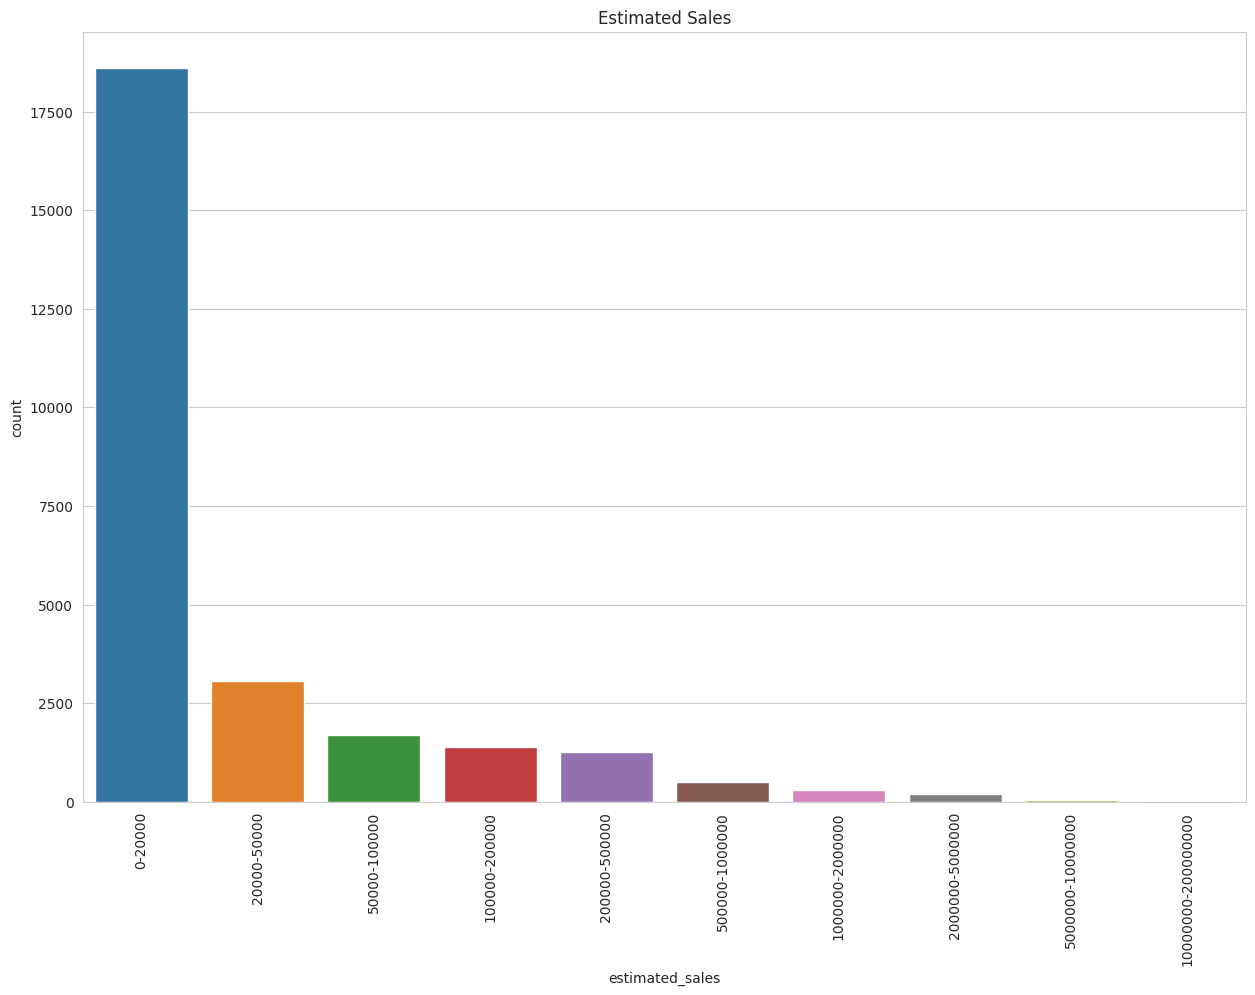

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(15, 10))
plt.title('Estimated Sales')
plt.xticks(rotation=90)
sns.countplot(x="estimated_sales", data=data, order = data['estimated_sales'].value_counts().index)

**Predictiom Features (Only integer / float)**

<Axes: title={'center': 'Required Age'}, xlabel='required_age', ylabel='count'>

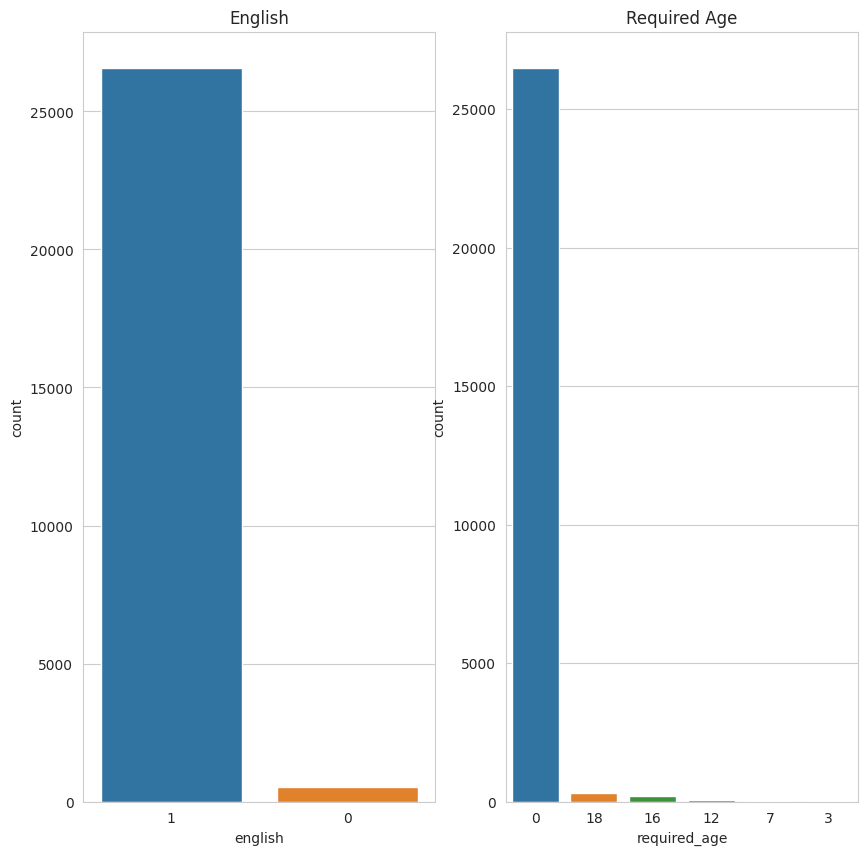

In [ ]:
plt.figure(figsize=(10, 10))

# English
plt.subplot(1, 2, 1)
plt.title('English')
sns.countplot(x="english", data=data, order = data['english'].value_counts().index)

# Required Age
plt.subplot(1, 2, 2)
plt.title('Required Age')
sns.countplot(x="required_age", data=data, order = data['required_age'].value_counts().index)

<Axes: title={'center': 'Month'}, xlabel='count', ylabel='month'>

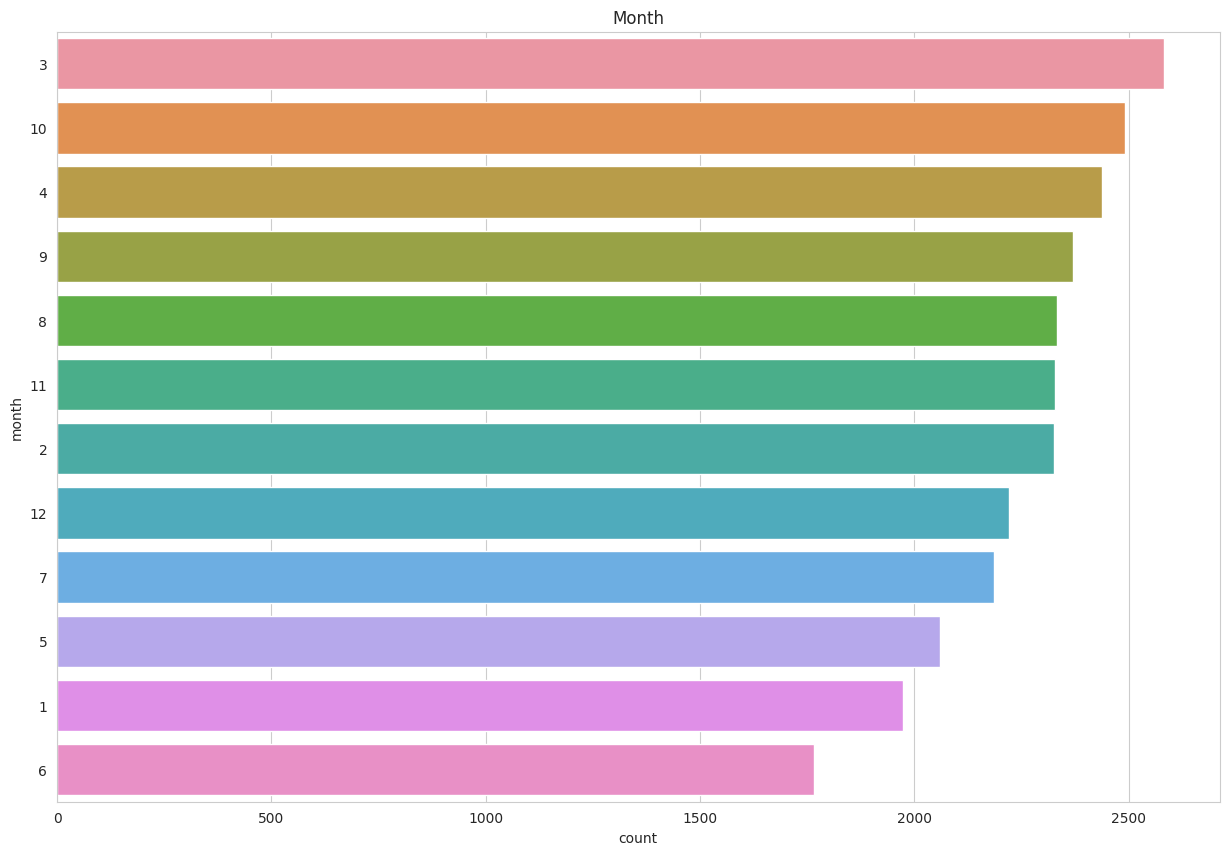

In [ ]:
# Month
plt.figure(figsize=(15, 10))
plt.title('Month')
sns.countplot(y="month", data=data, order = data['month'].value_counts().index)

<Axes: title={'center': 'Year'}, xlabel='count', ylabel='year'>

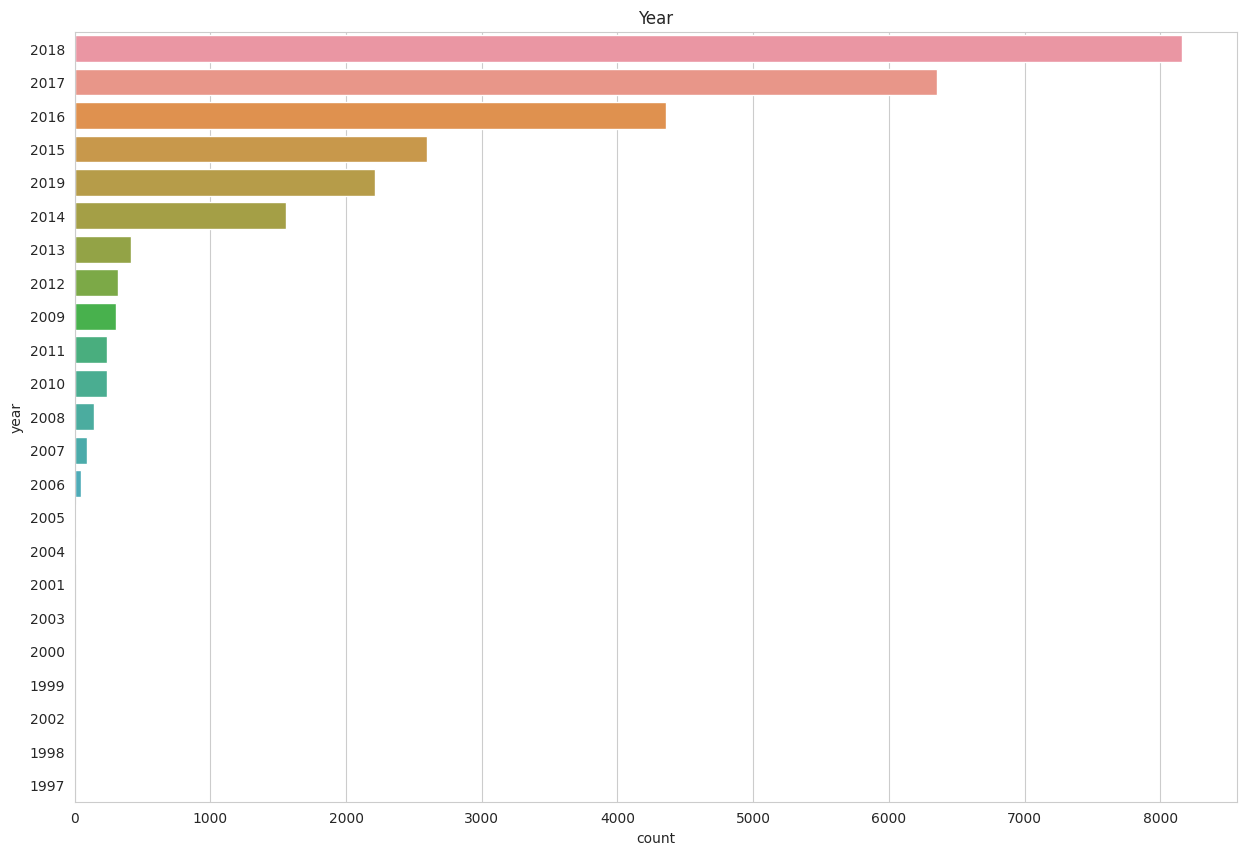

In [ ]:
# Year
plt.figure(figsize=(15, 10))
plt.title('Year')
sns.countplot(y="year", data=data, order = data['year'].value_counts().index)

<Axes: title={'center': 'Median Playtime'}, xlabel='median_playtime', ylabel='Density'>

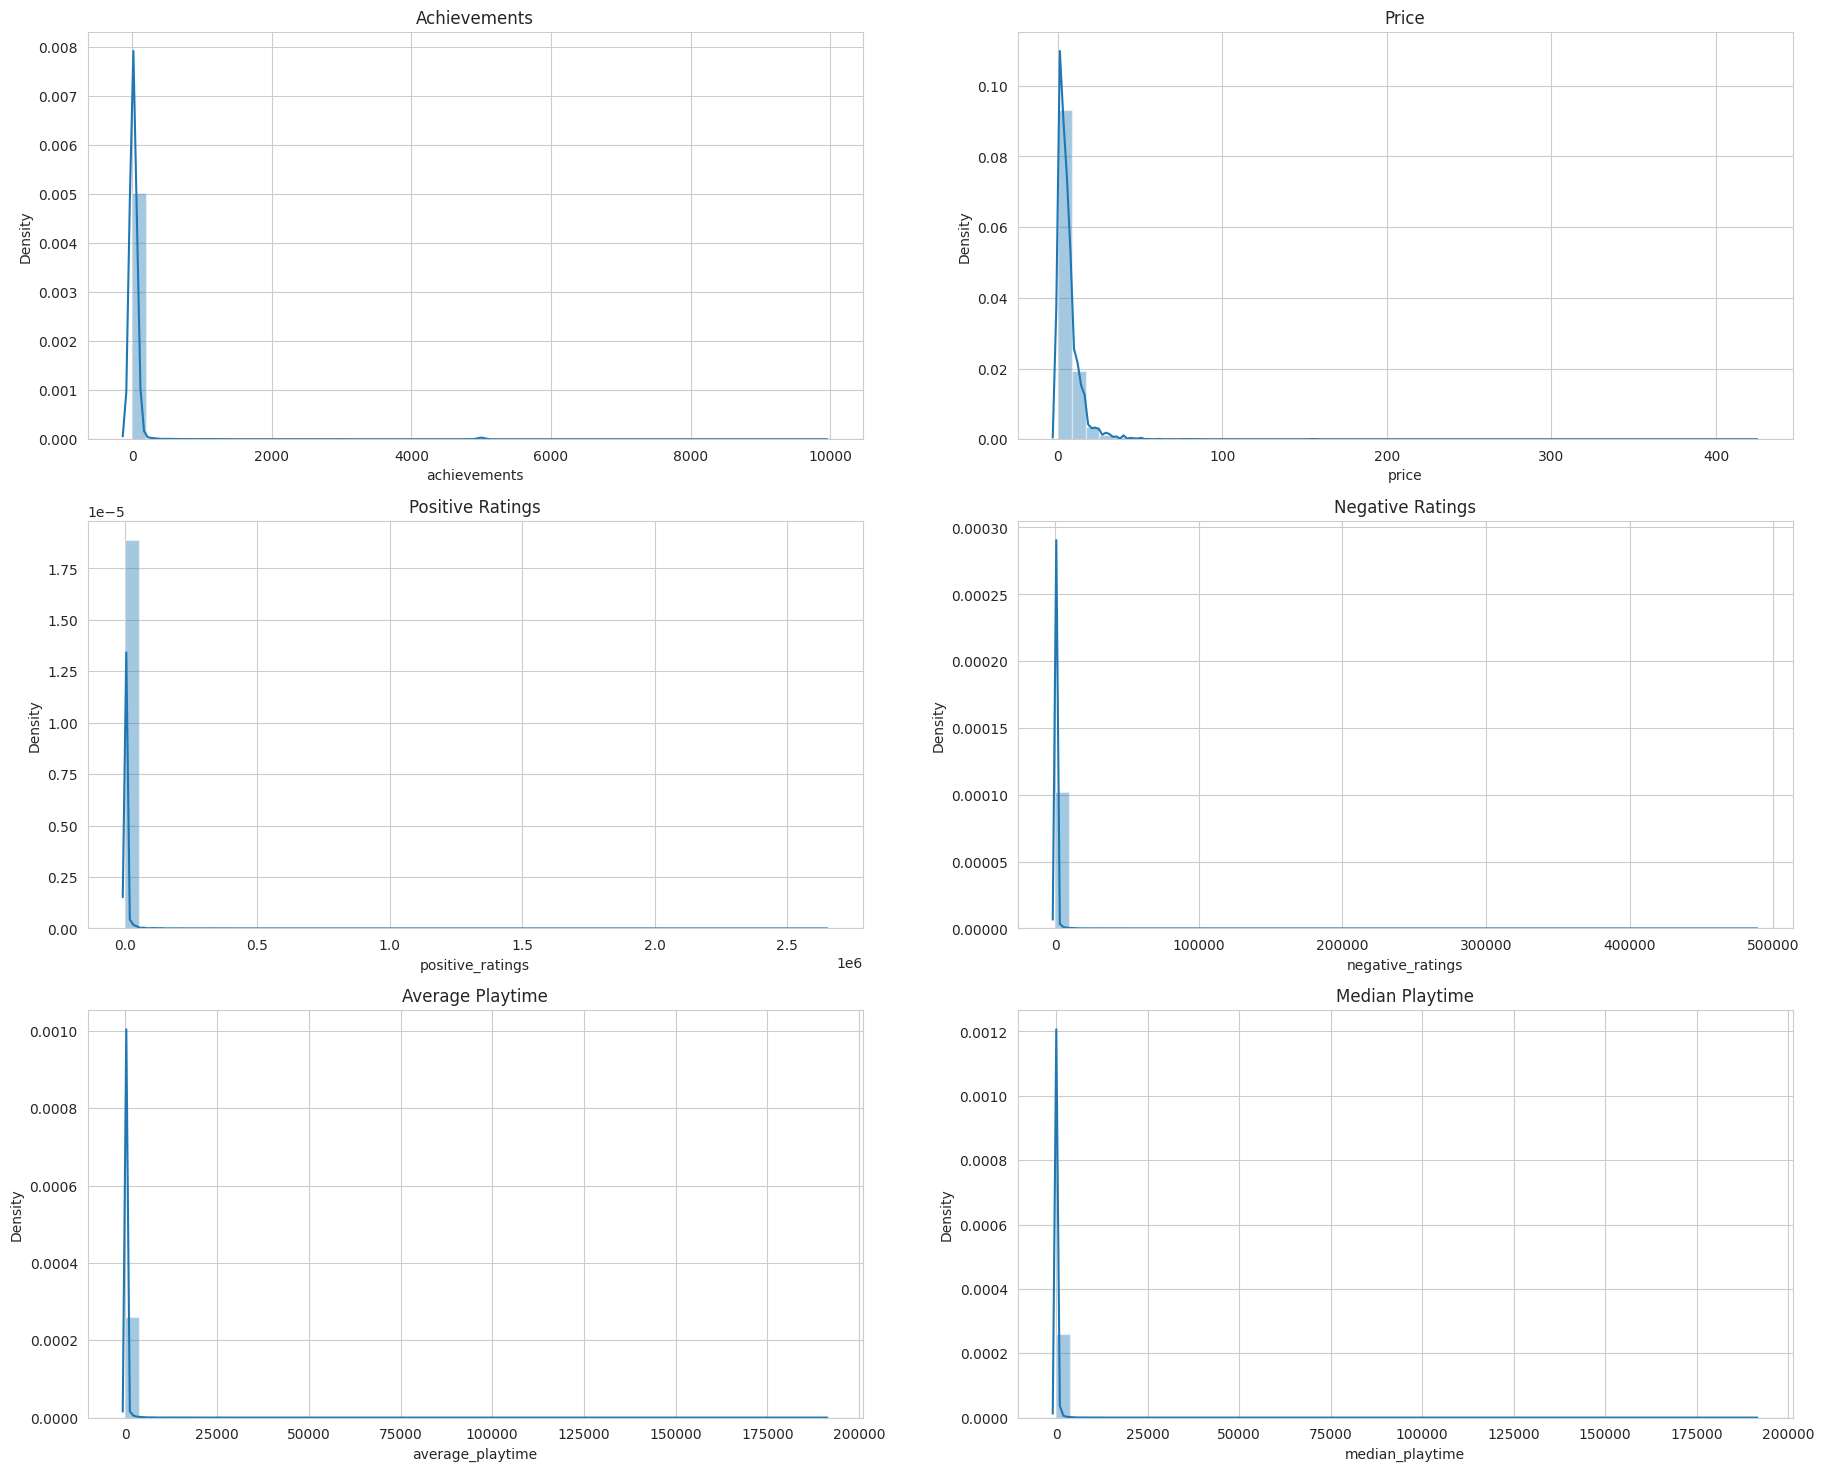

In [ ]:
plt.figure(figsize=(22, 18))

# Achievements
plt.subplot(3, 2, 1)
plt.title('Achievements')
sns.distplot(data['achievements'])

# Price
plt.subplot(3, 2, 2)
plt.title('Price')
sns.distplot(data['price'])

# Positive Ratings
plt.subplot(3, 2, 3)
plt.title('Positive Ratings')
sns.distplot(data['positive_ratings'])

# Negative Ratings
plt.subplot(3, 2, 4)
plt.title('Negative Ratings')
sns.distplot(data['negative_ratings'])

# Average Playtime
plt.subplot(3, 2, 5)
plt.title('Average Playtime')
sns.distplot(data['average_playtime'])

# Median Playtime
plt.subplot(3, 2, 6)
plt.title('Median Playtime')
sns.distplot(data['median_playtime'])

**Predictiom Features (Only string)**
*   Top Genres of game



<Axes: title={'center': 'Top Genres (Not Split)'}, xlabel='count', ylabel='genres'>

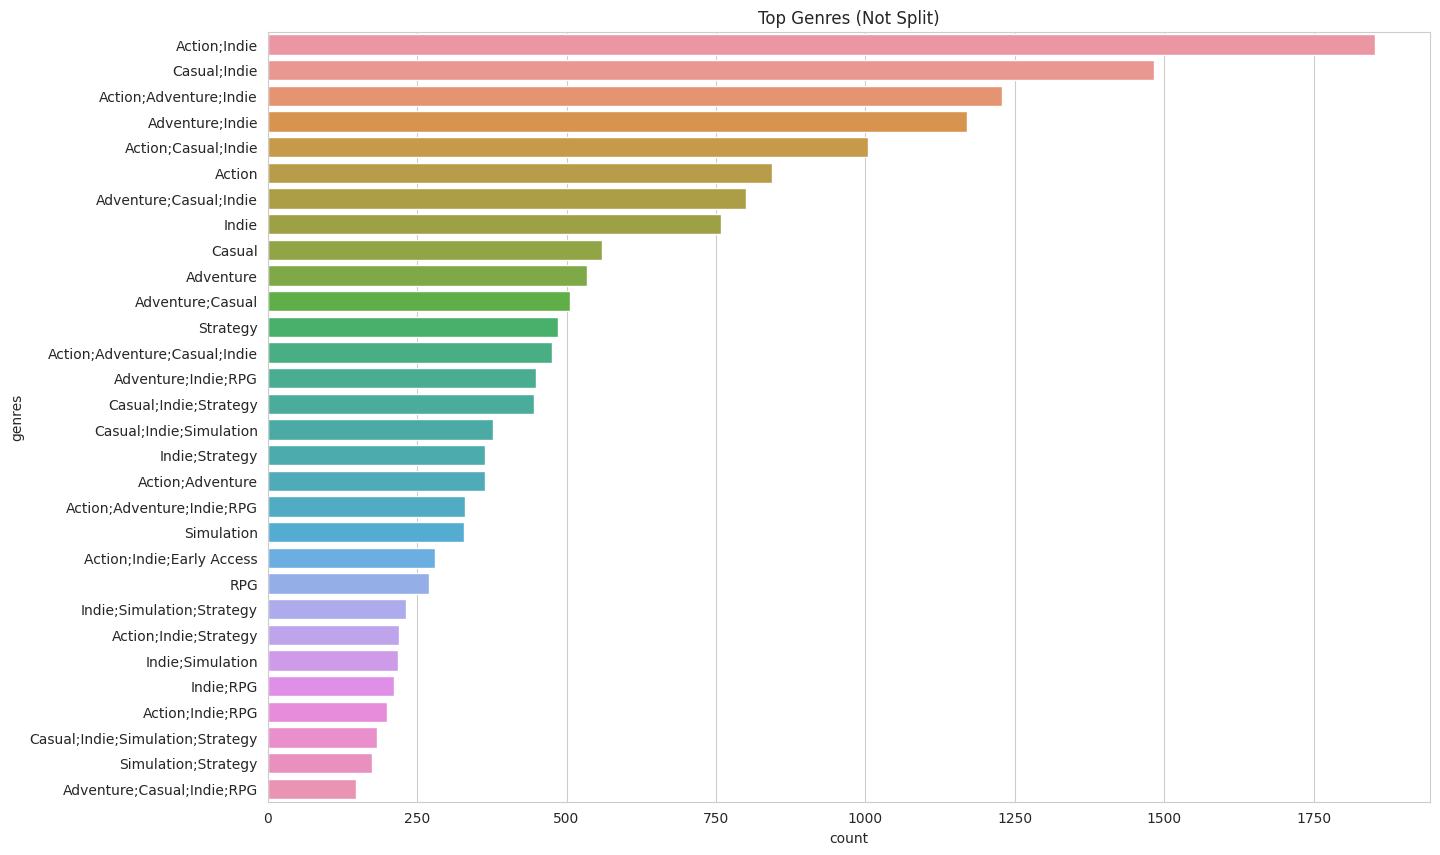

In [ ]:
# Top Genres of game (Not Split)
plt.figure(figsize=(15, 10))
plt.title('Top Genres (Not Split)')
sns.countplot(y="genres", data=data, order = data['genres'].value_counts().iloc[:30].index)

<Axes: title={'center': 'Top Genres (Split)'}, xlabel='count', ylabel='genres'>

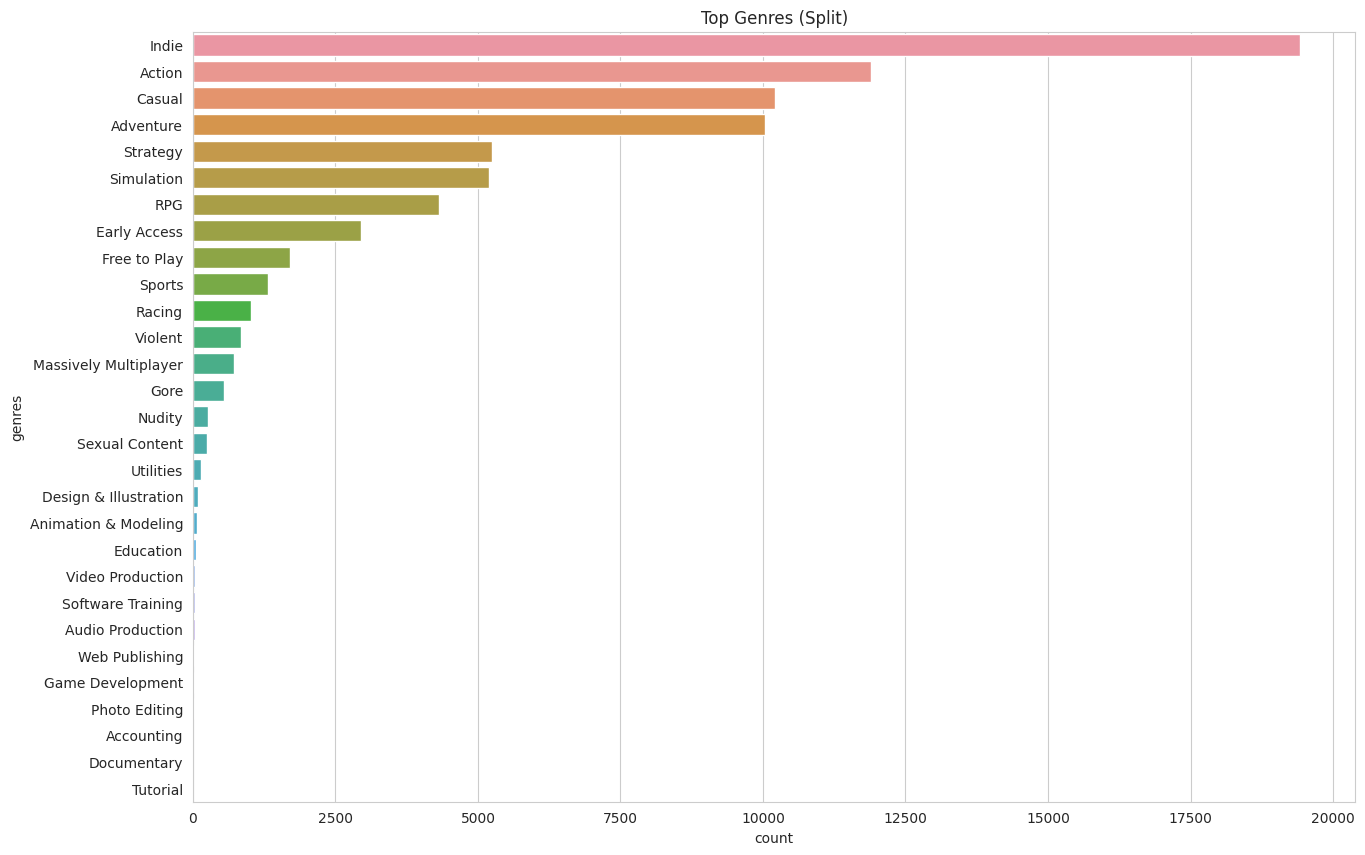

In [ ]:
# Top Genres of game (Split)
top_genres = count_labels('genres')

plt.figure(figsize=(15, 10))
plt.title('Top Genres (Split)')
sns.countplot(y="genres", data=top_genres, order = top_genres['genres'].value_counts().iloc[:30].index)

*   Top Categories of game



<Axes: title={'center': 'Top Categories (Not Split)'}, xlabel='count', ylabel='categories'>

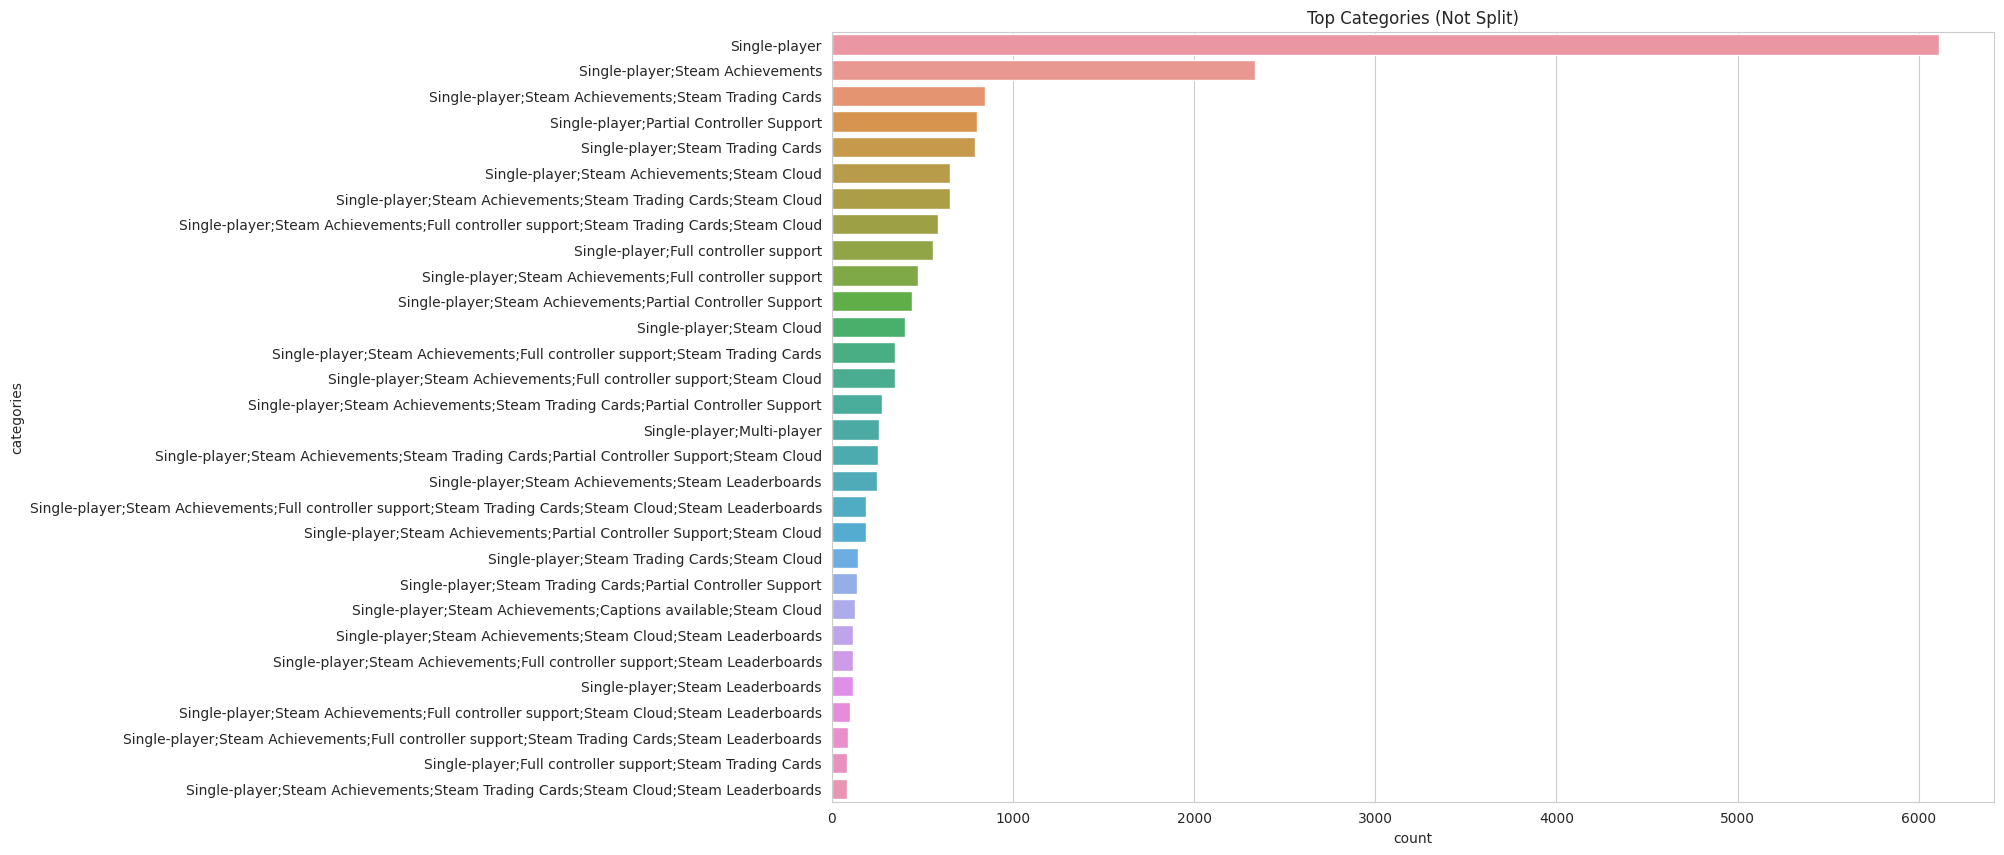

In [ ]:
# Top Categories of game (Not Split)
plt.figure(figsize=(15, 10))
plt.title('Top Categories (Not Split)')
sns.countplot(y="categories", data=data, order = data['categories'].value_counts().iloc[:30].index)

<Axes: title={'center': 'Top Categories (Split)'}, xlabel='count', ylabel='categories'>

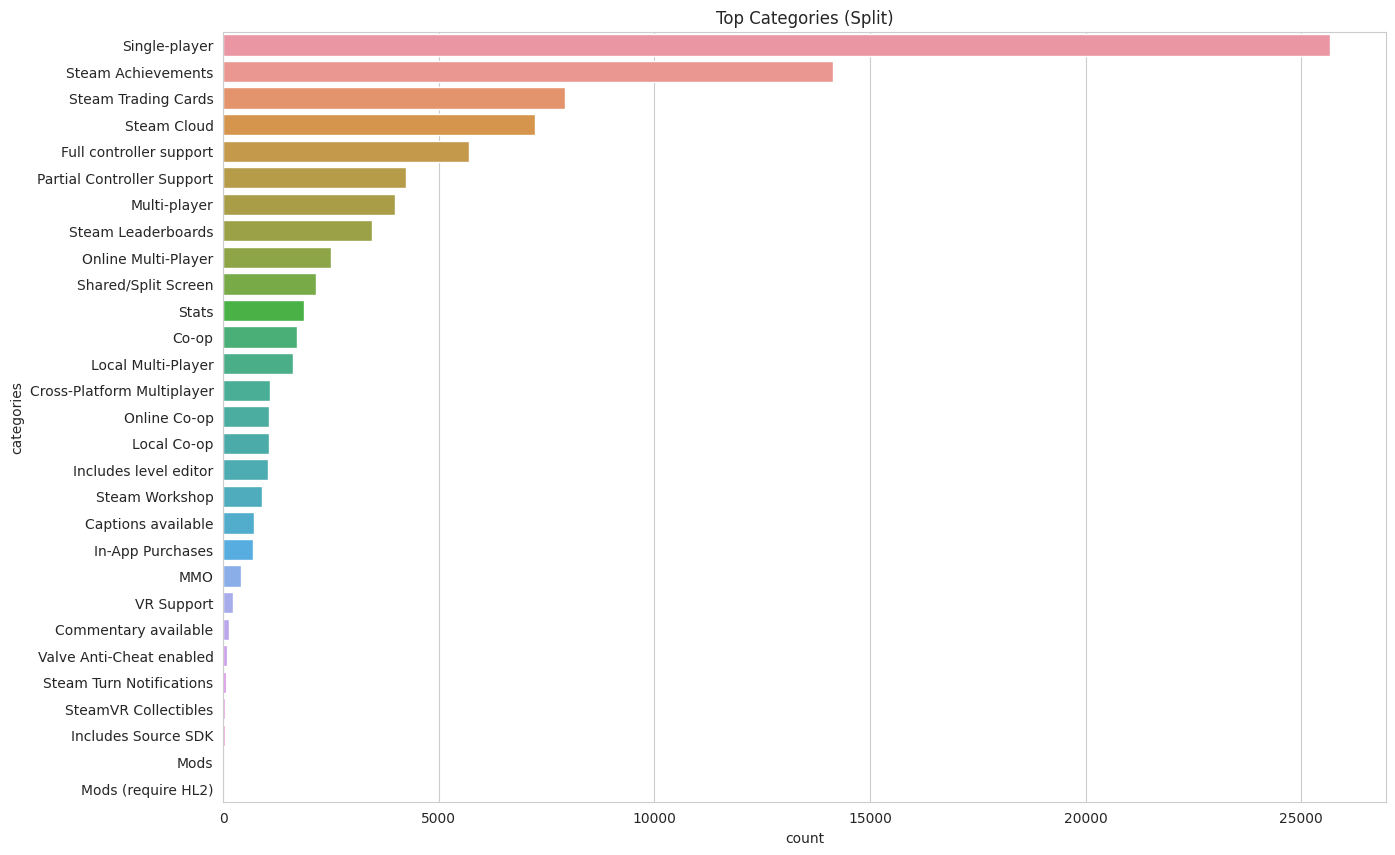

In [ ]:
# Top Categories of game (Split)
top_categories = count_labels('categories')

plt.figure(figsize=(15, 10))
plt.title('Top Categories (Split)')
sns.countplot(y="categories", data=top_categories, order = top_categories['categories'].value_counts().iloc[:30].index)

*   Top Steamspy Tags



<Axes: title={'center': 'Top Steamspy Tags (Not Split)'}, xlabel='count', ylabel='steamspy_tags'>

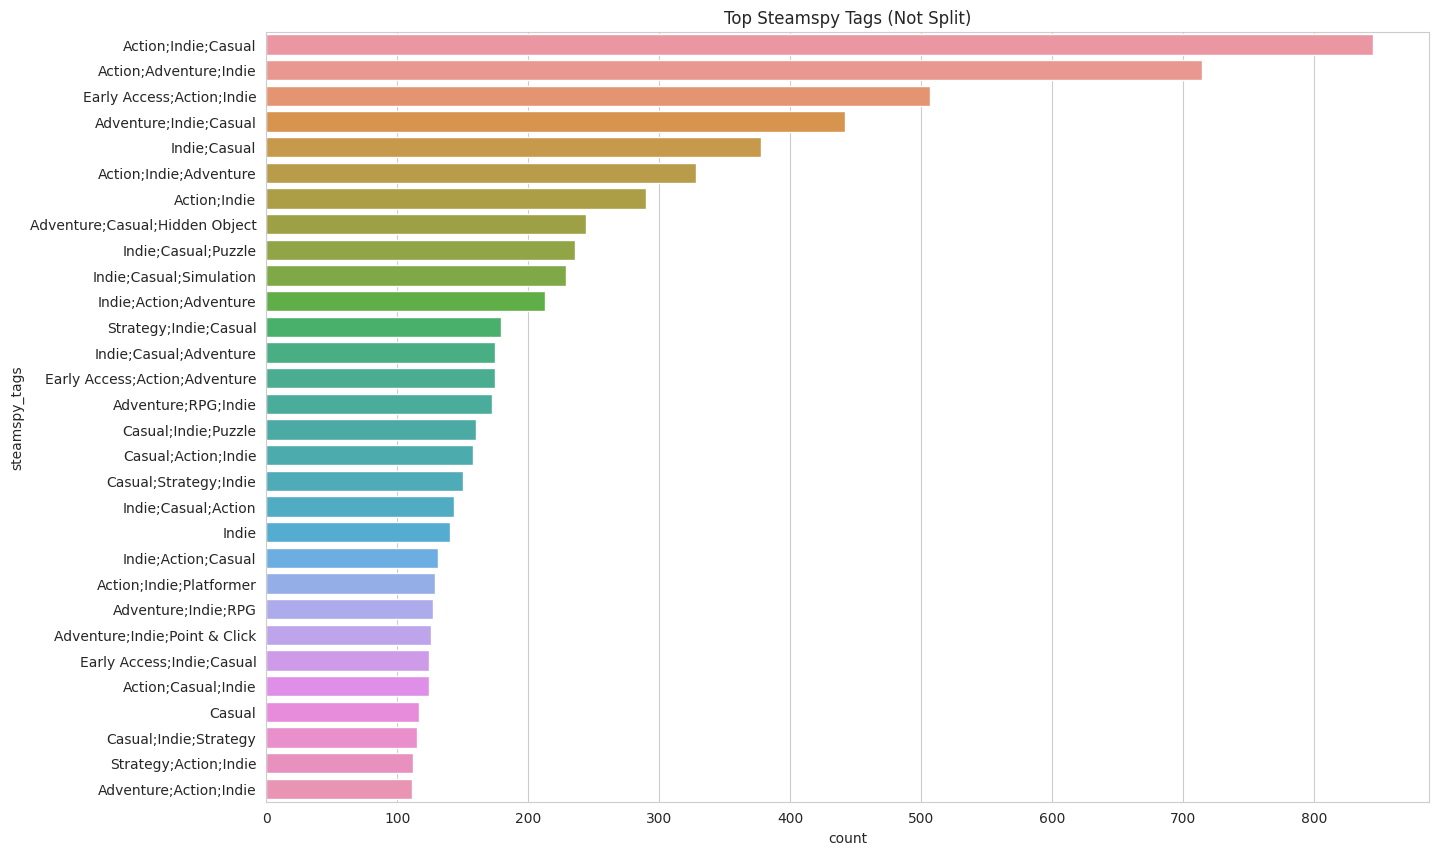

In [ ]:
# Top Steamspy Tags (Not Split)
plt.figure(figsize=(15, 10))
plt.title('Top Steamspy Tags (Not Split)')
sns.countplot(y="steamspy_tags", data=data, order = data['steamspy_tags'].value_counts().iloc[:30].index)

<Axes: title={'center': 'Top Steamspy Tags (Split)'}, xlabel='count', ylabel='steamspy_tags'>

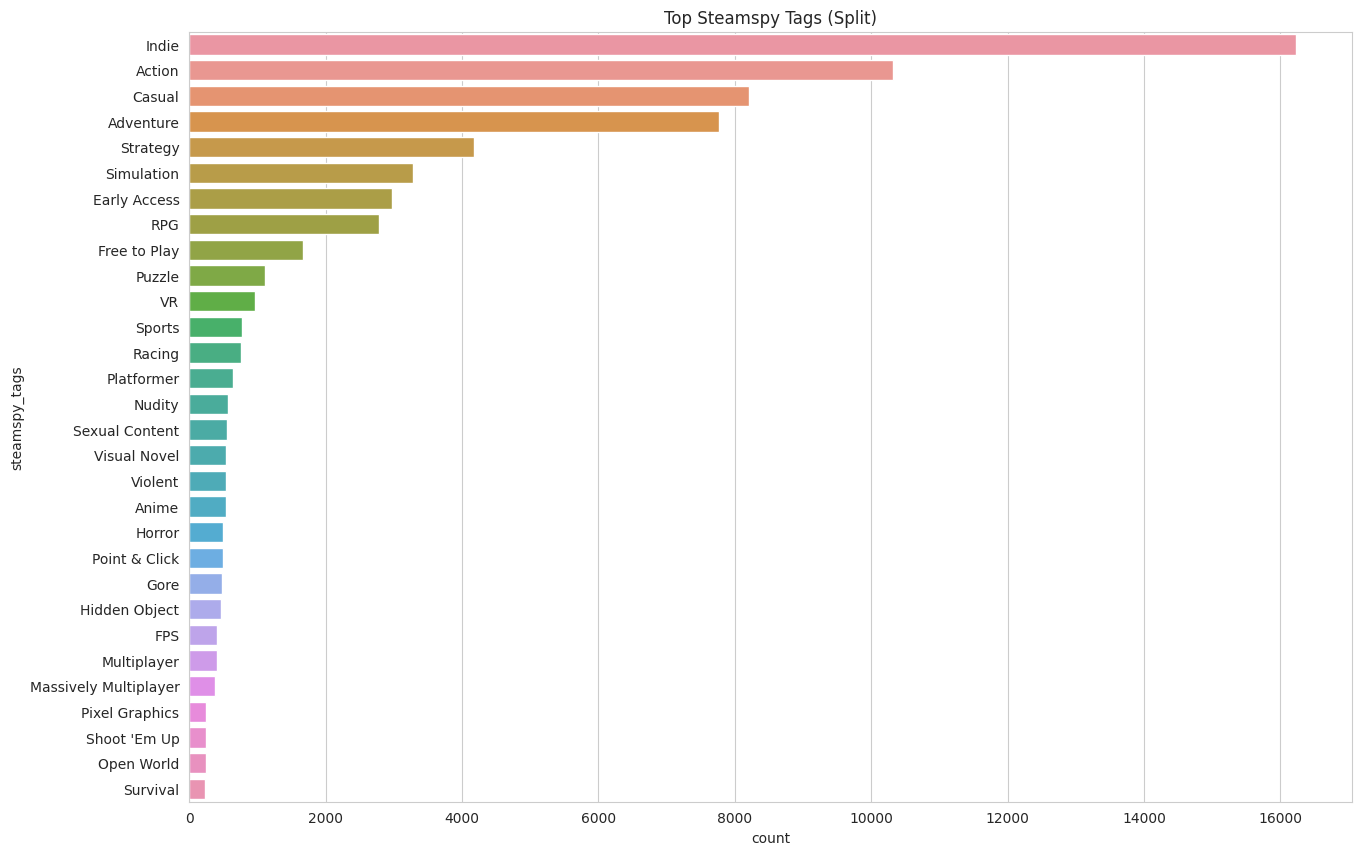

In [ ]:
# Top Steamspy Tags (Split)
top_steamspy_tags = count_labels('steamspy_tags')

plt.figure(figsize=(15, 10))
plt.title('Top Steamspy Tags (Split)')
sns.countplot(y="steamspy_tags", data=top_steamspy_tags, order = top_steamspy_tags['steamspy_tags'].value_counts().iloc[:30].index)

*   Platform



<Axes: title={'center': 'Platform (Not Split)'}, xlabel='platforms', ylabel='count'>

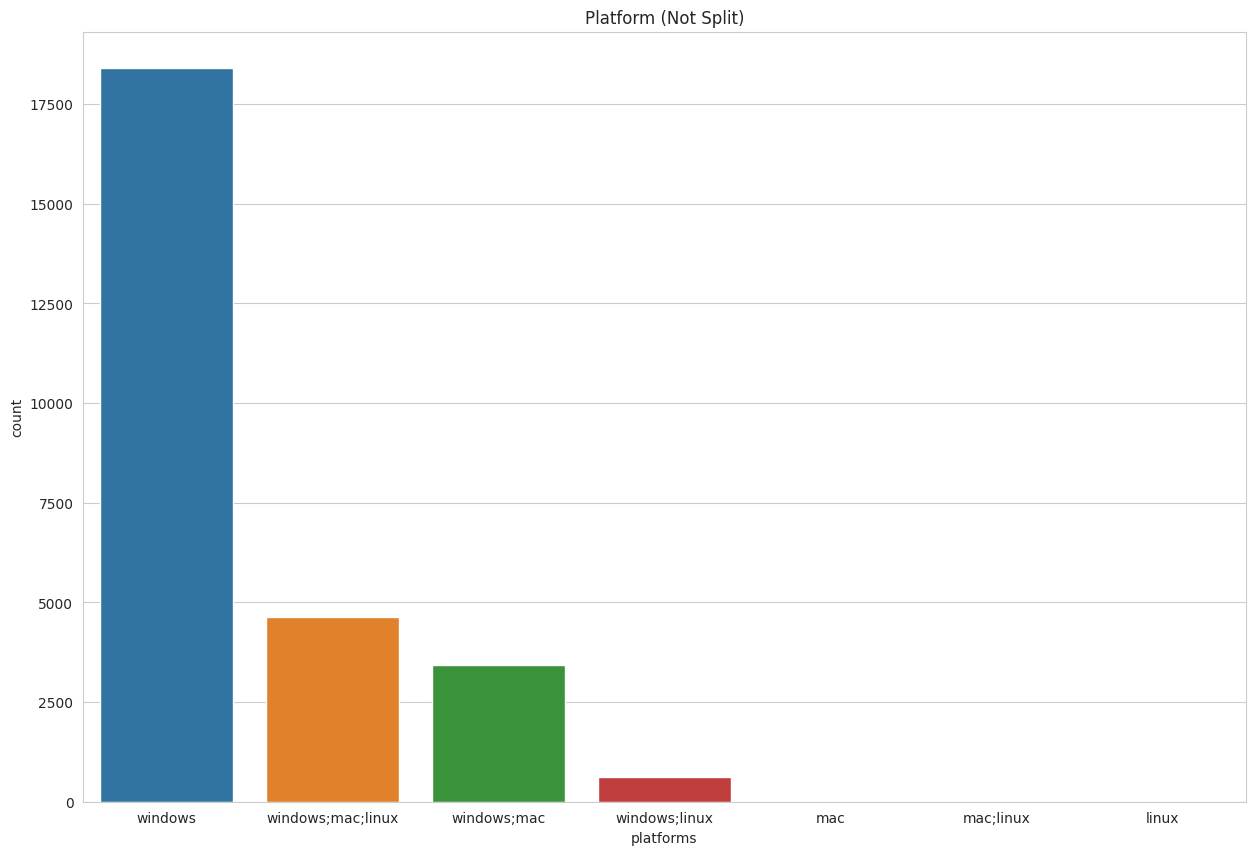

In [ ]:
# Platform (Not Split)
plt.figure(figsize=(15, 10))
plt.title('Platform (Not Split)')
sns.countplot(x="platforms", data=data, order = data['platforms'].value_counts().index)

<Axes: title={'center': 'Platform (Split)'}, xlabel='platforms', ylabel='count'>

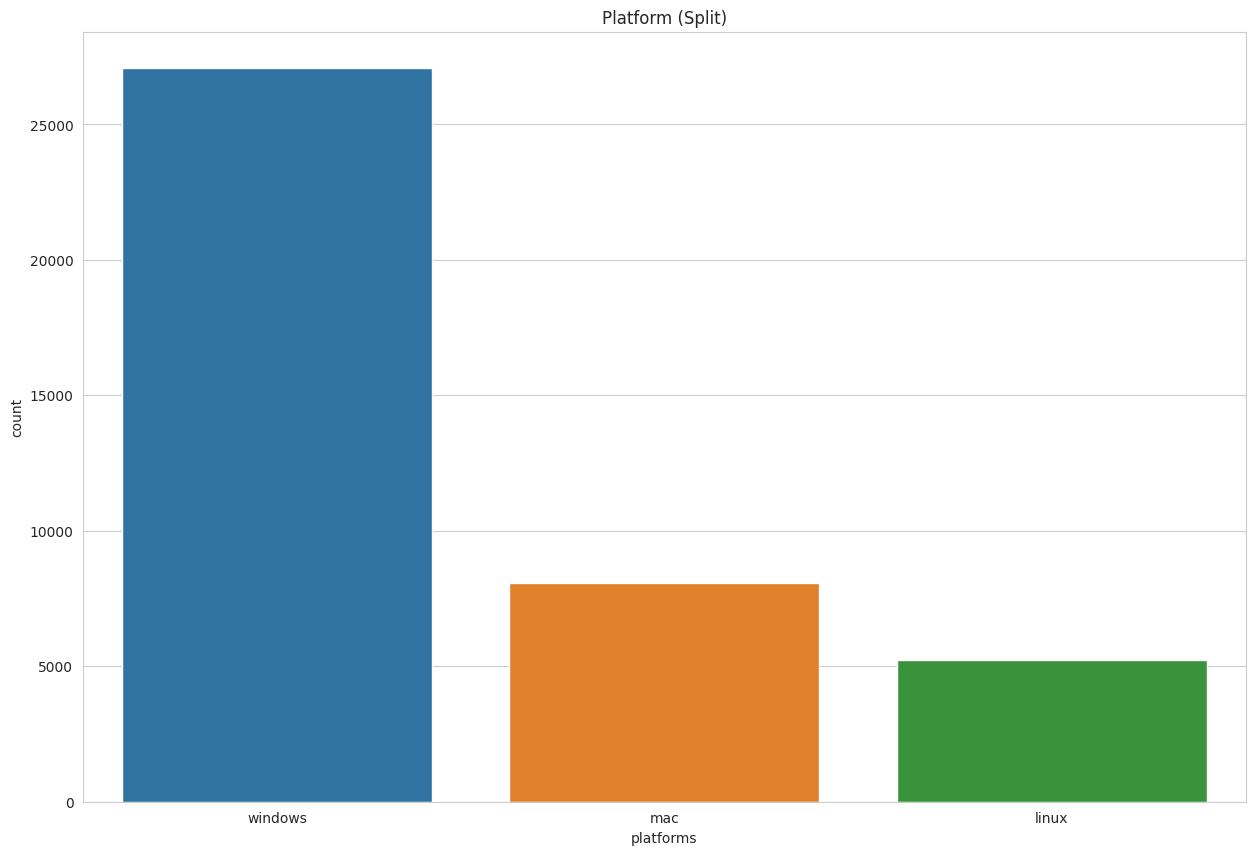

In [ ]:
# Platform (Split)
top_platforms = count_labels('platforms')

plt.figure(figsize=(15, 10))
plt.title('Platform (Split)')
sns.countplot(x="platforms", data=top_platforms, order = top_platforms['platforms'].value_counts().index)

*   Top Publisher



<Axes: title={'center': 'Top Publisher (Not Split)'}, xlabel='count', ylabel='publisher'>

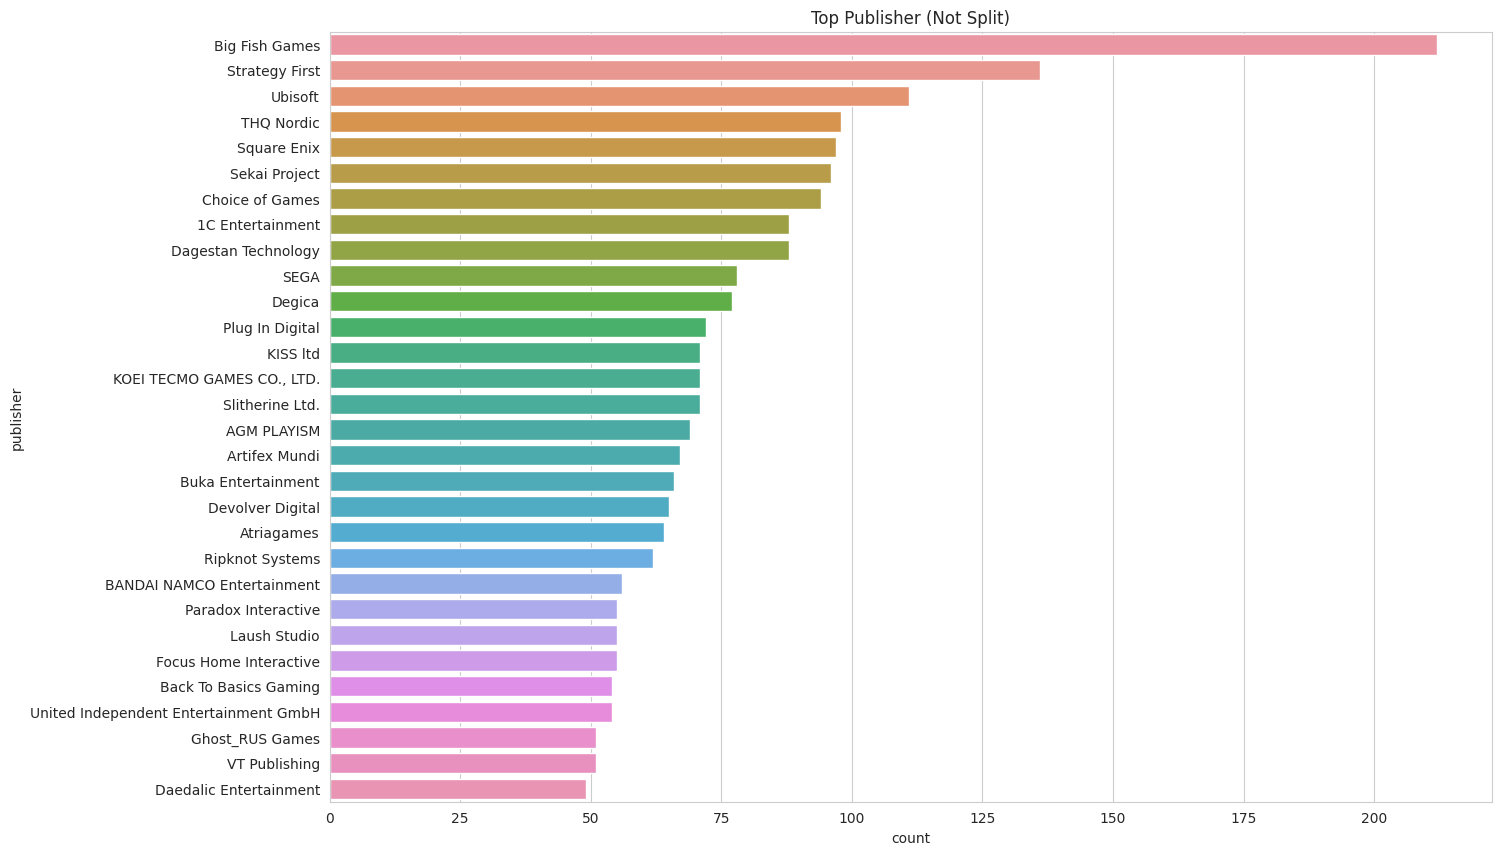

In [ ]:
# Top Publisher (Not Split)
plt.figure(figsize=(15, 10))
plt.title('Top Publisher (Not Split)')
sns.countplot(y="publisher", data=data, order = data['publisher'].value_counts().iloc[:30].index)

<Axes: title={'center': 'Top Publisher (Split)'}, xlabel='count', ylabel='publisher'>

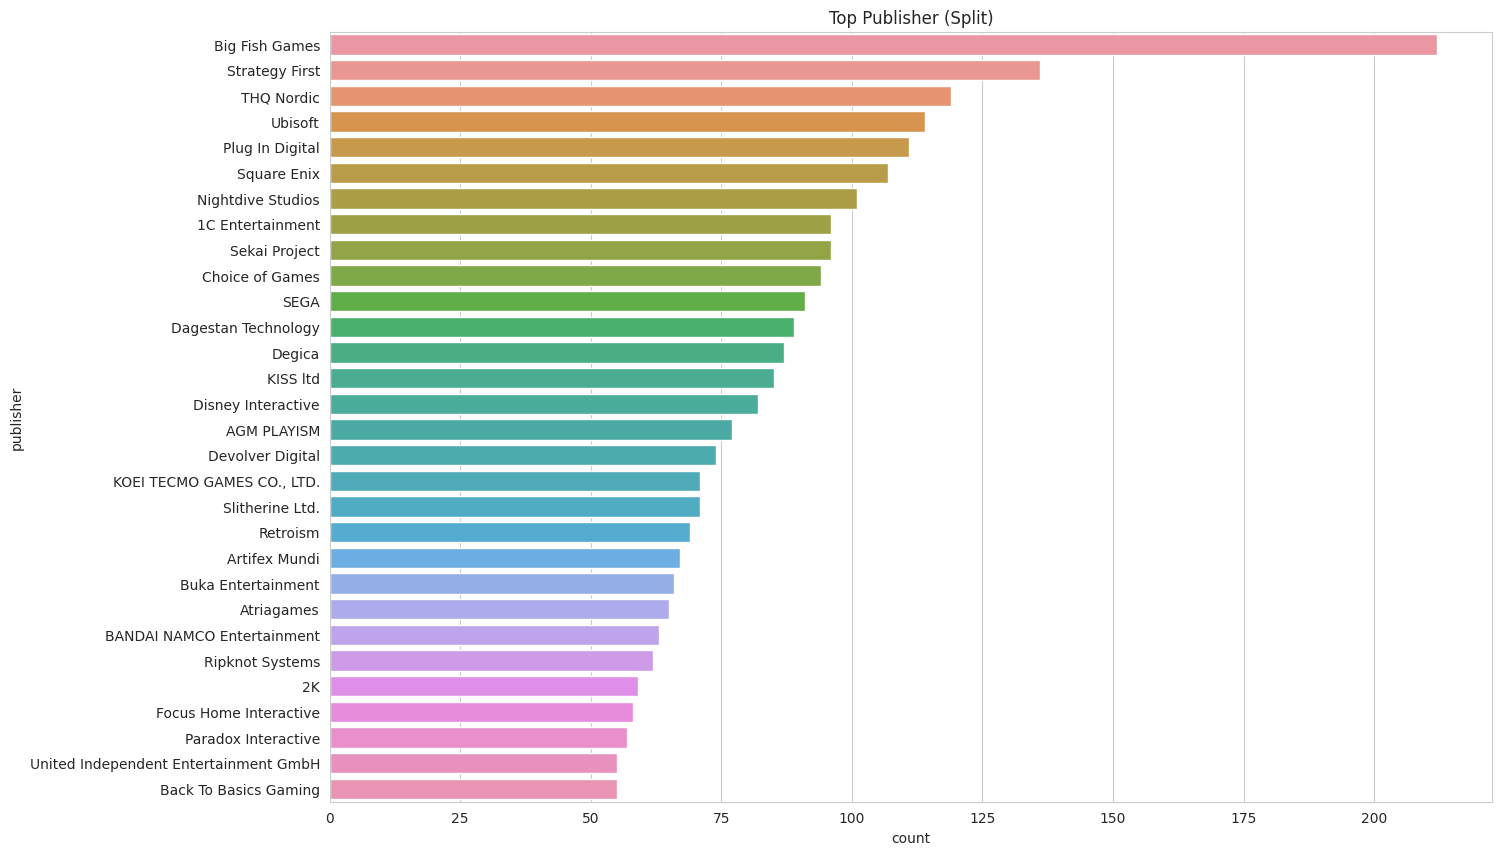

In [ ]:
# Top Publisher (Split)
top_publisher = count_labels('publisher')

plt.figure(figsize=(15, 10))
plt.title('Top Publisher (Split)')
sns.countplot(y="publisher", data=top_publisher, order = top_publisher['publisher'].value_counts().iloc[:30].index)

*   Top Developer


<Axes: title={'center': 'Top Developer (Not Split)'}, xlabel='count', ylabel='developer'>

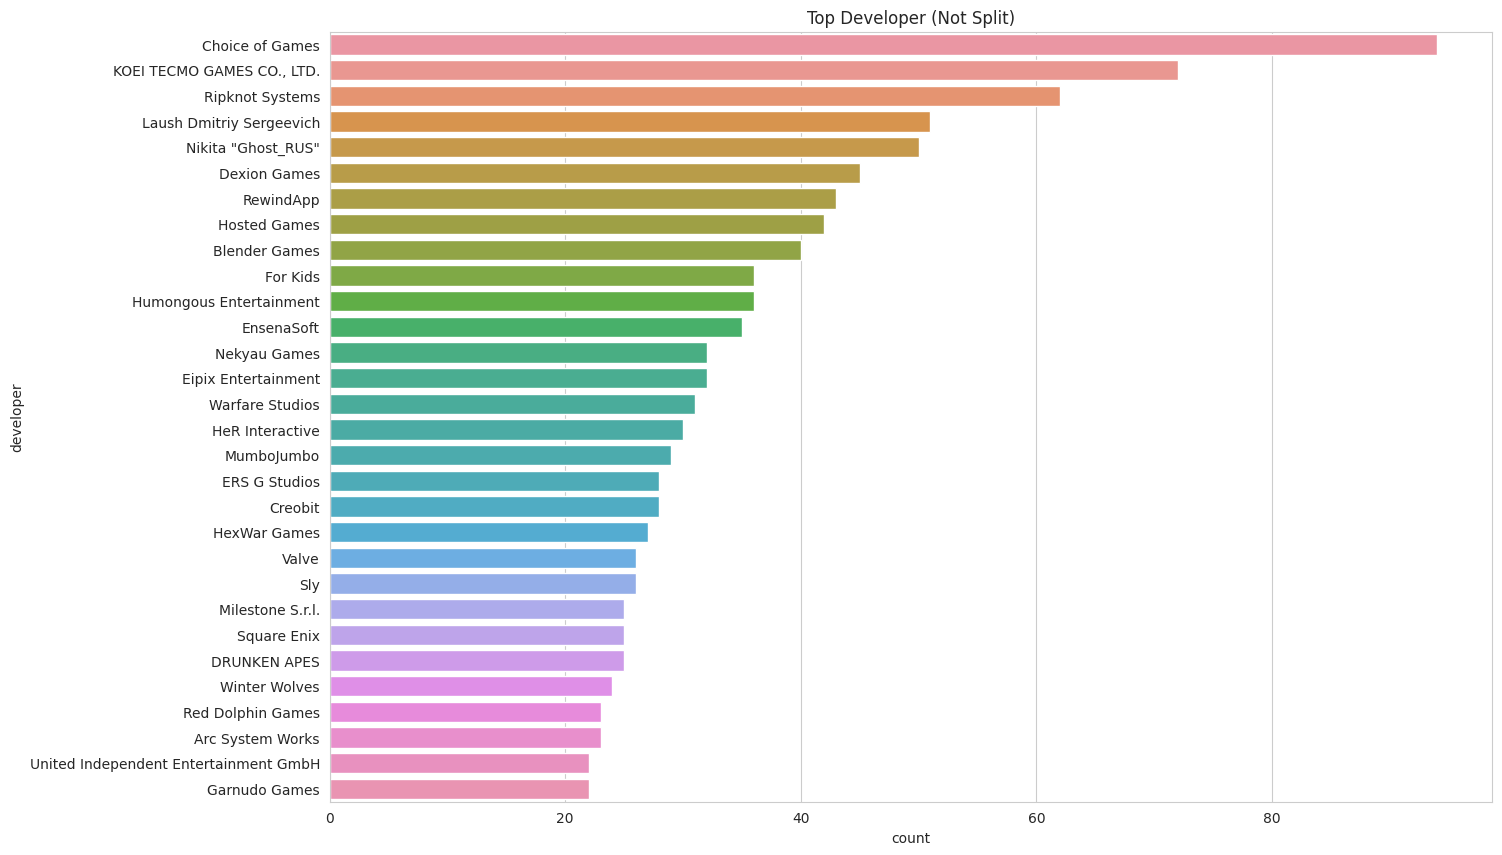

In [ ]:
# Top Developer (Not Split)
plt.figure(figsize=(15, 10))
plt.title('Top Developer (Not Split)')
sns.countplot(y="developer", data=data, order = data['developer'].value_counts().iloc[:30].index)

<Axes: title={'center': 'Top Developer (Split)'}, xlabel='count', ylabel='developer'>

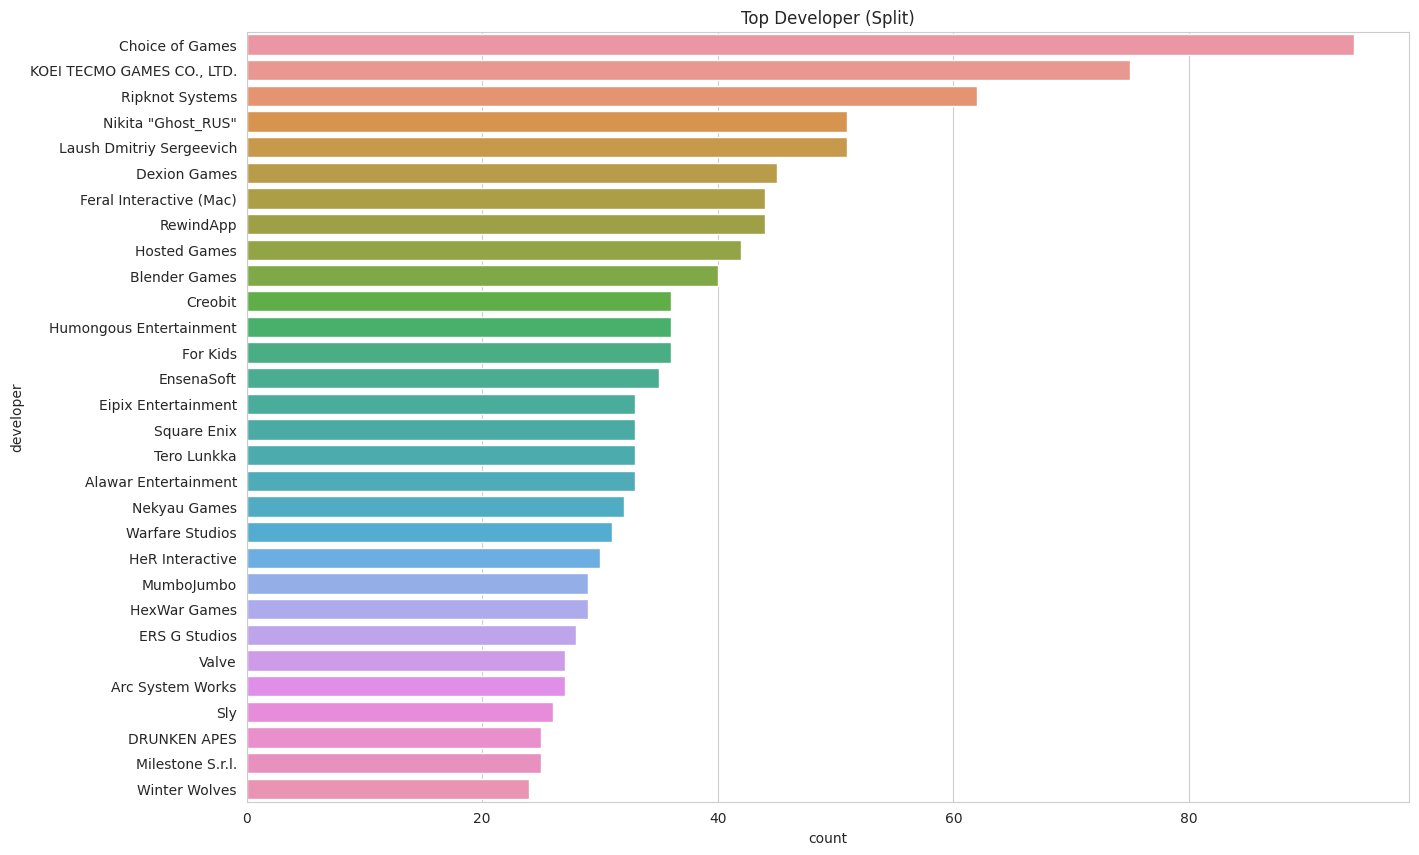

In [ ]:
# Top Developer (Split)
top_developer = count_labels('developer')

plt.figure(figsize=(15, 10))
plt.title('Top Developer (Split)')
sns.countplot(y="developer", data=top_developer, order = top_developer['developer'].value_counts().iloc[:30].index)

**Genres of games have the highest sales**

In [ ]:
data_genre = data.groupby(by=['genres'])['sales_takeLog'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['sales_takeLog'], ascending=False)

<Axes: title={'center': 'Genres of games have the highest sales'}, xlabel='sales_takeLog', ylabel='genres'>

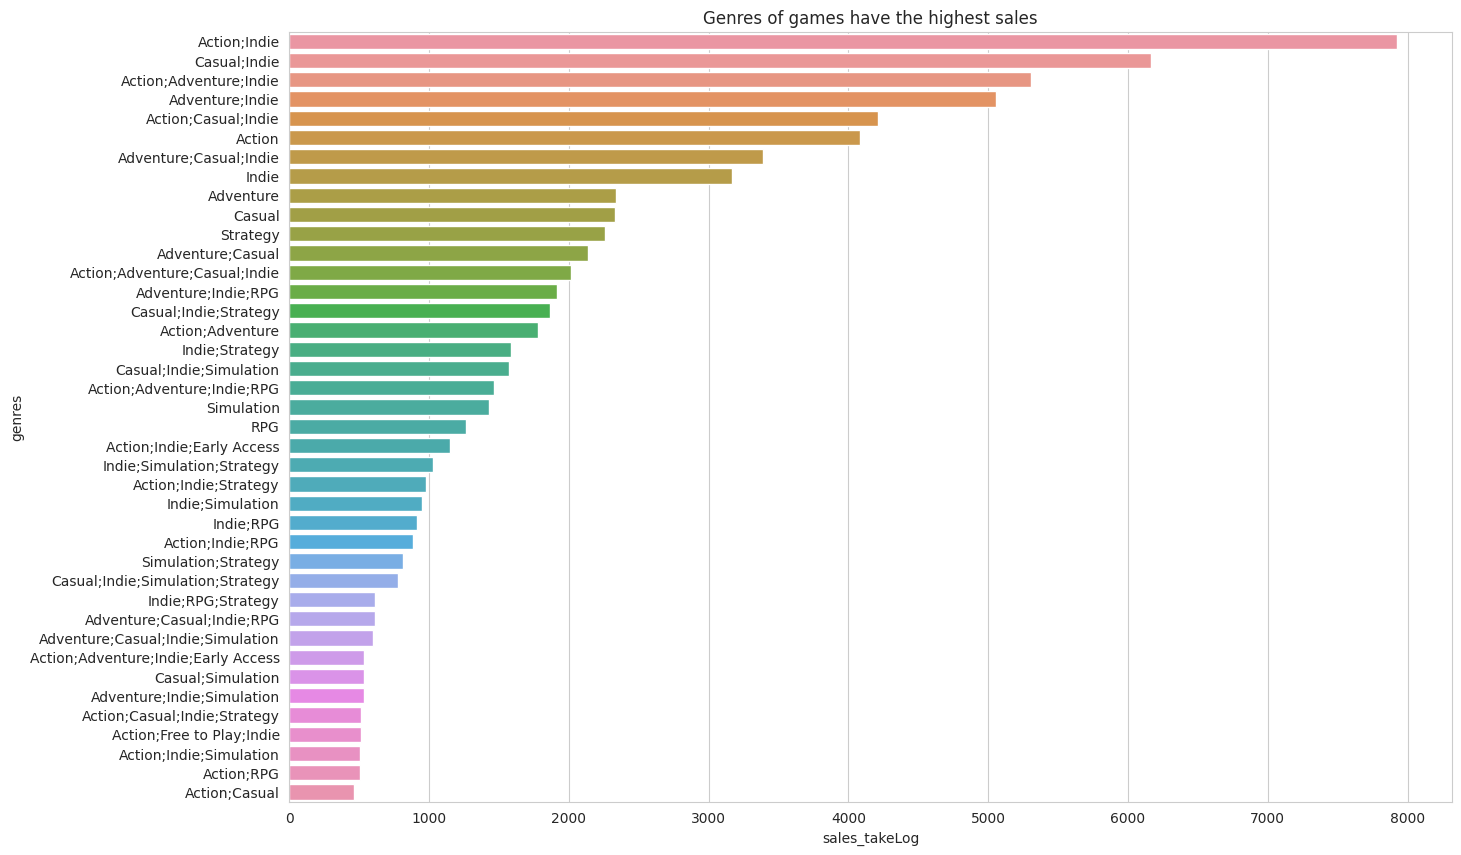

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Genres of games have the highest sales')
sns.barplot(x="sales_takeLog", y="genres", data=data_genre.iloc[:40])

**Categories have the highest sales**

In [ ]:
data_categories = data.groupby(by=['categories'])['sales_takeLog'].sum()
data_categories = data_categories.reset_index()
data_categories = data_categories.sort_values(by=['sales_takeLog'], ascending=False)

<Axes: title={'center': 'Categories have the highest sales'}, xlabel='sales_takeLog', ylabel='categories'>

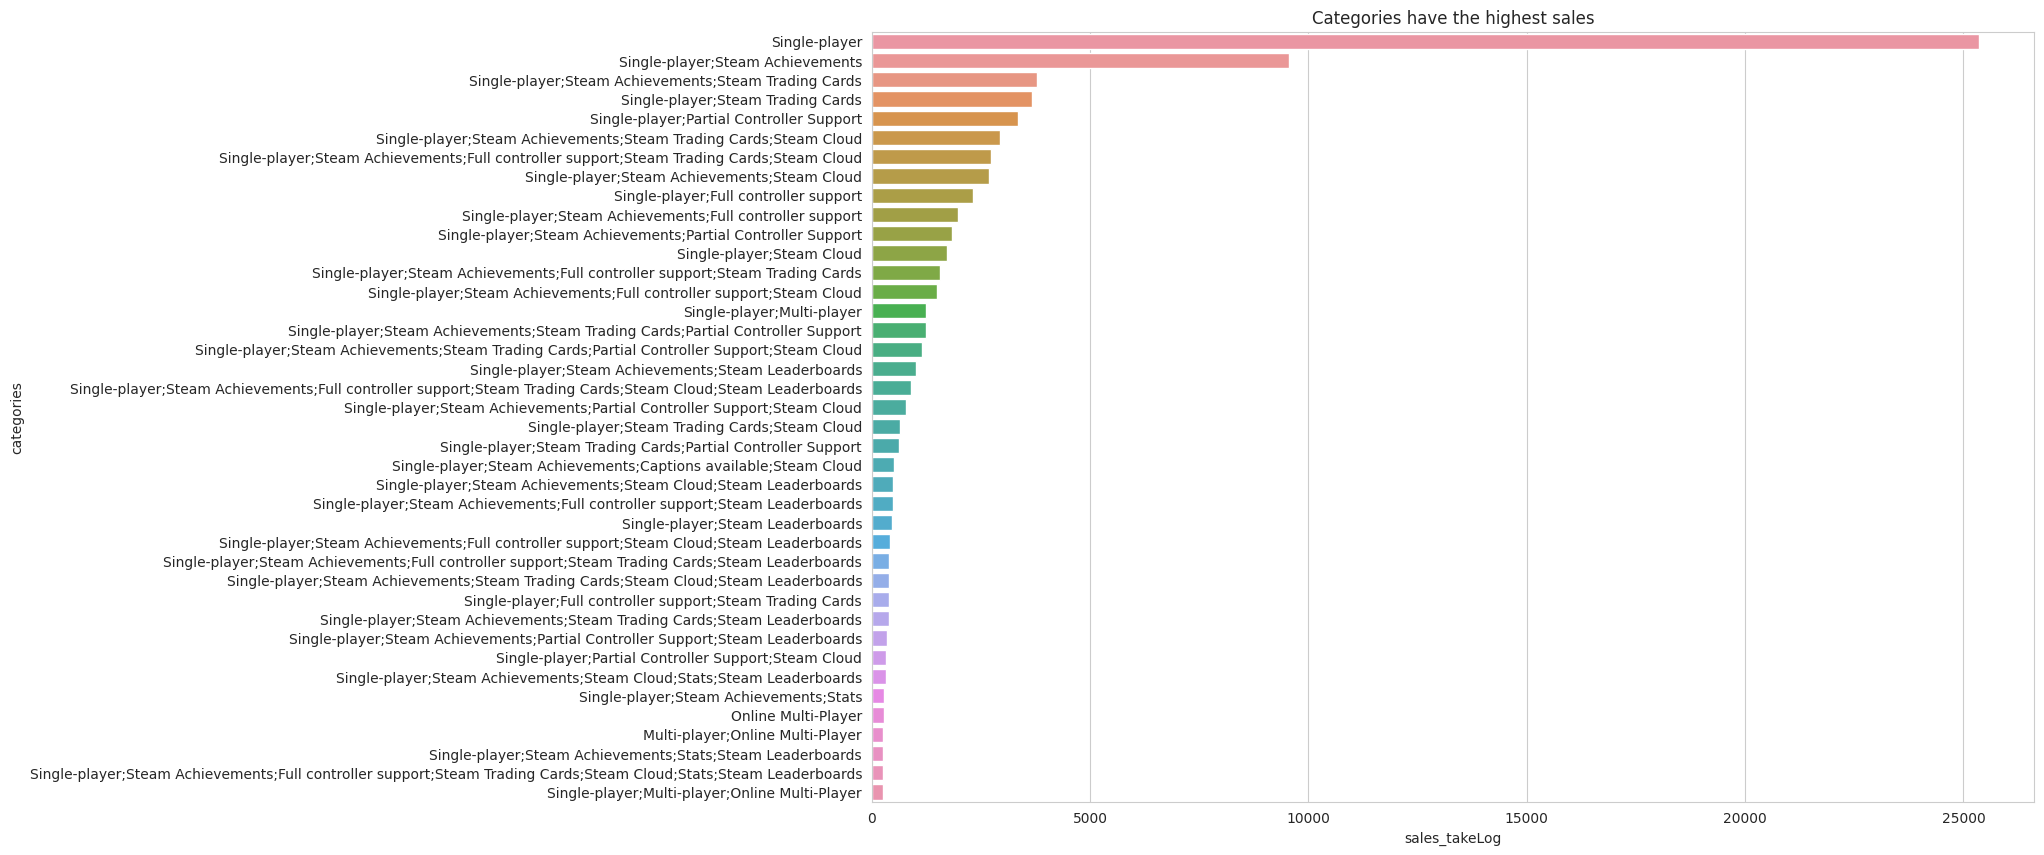

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Categories have the highest sales')
sns.barplot(x="sales_takeLog", y="categories", data=data_categories.iloc[:40])

**Steamspy Tags have the highest sales**

In [ ]:
data_steamspy_tags = data.groupby(by=['steamspy_tags'])['sales_takeLog'].sum()
data_steamspy_tags = data_steamspy_tags.reset_index()
data_steamspy_tags = data_steamspy_tags.sort_values(by=['sales_takeLog'], ascending=False)

<Axes: title={'center': 'Steamspy Tags have the highest sales'}, xlabel='sales_takeLog', ylabel='steamspy_tags'>

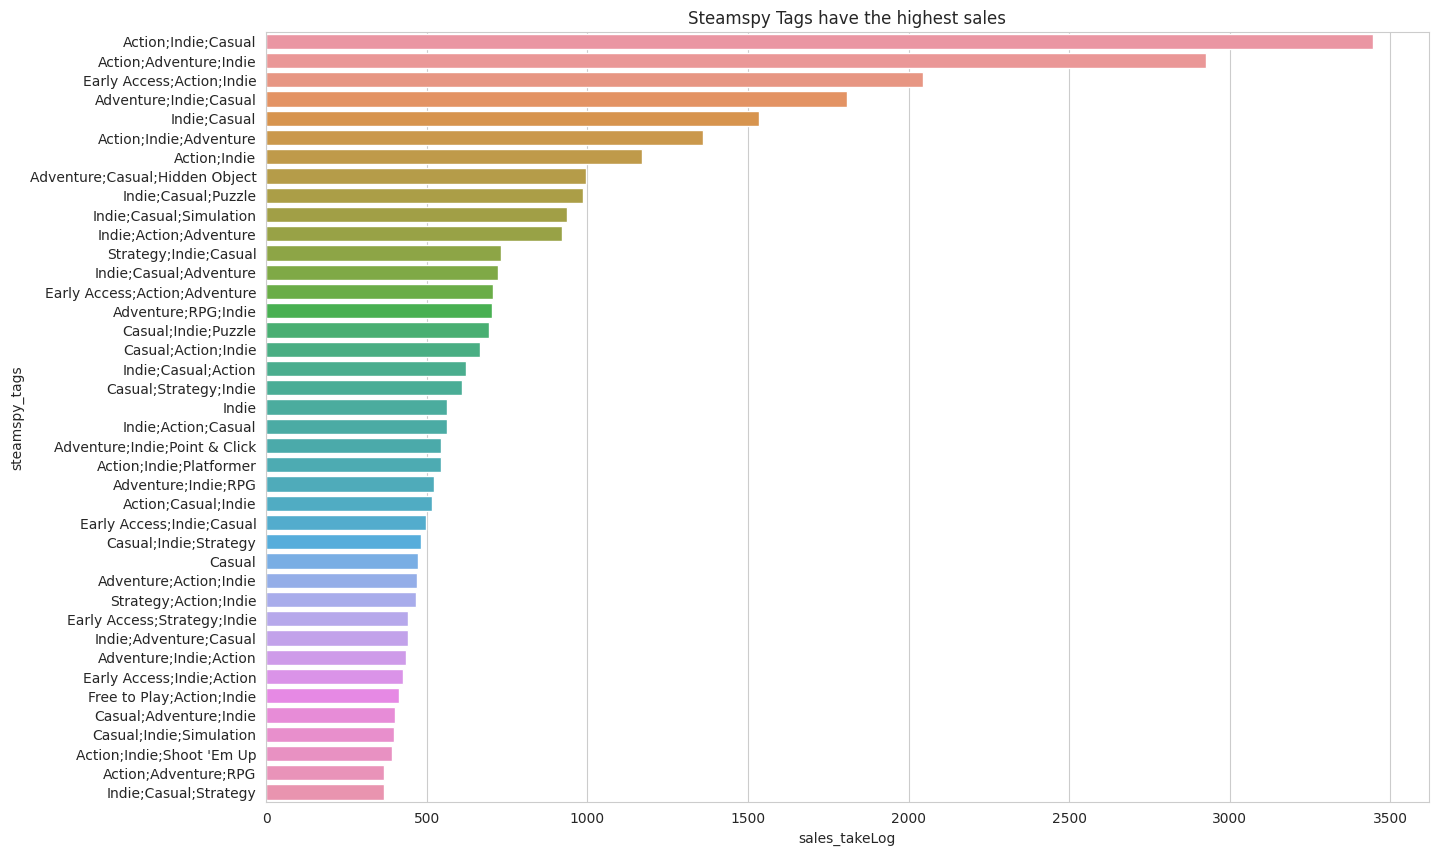

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Steamspy Tags have the highest sales')
sns.barplot(x="sales_takeLog", y="steamspy_tags", data=data_steamspy_tags.iloc[:40])

**Platform have the highest sales**

In [ ]:
data_platforms = data.groupby(by=['platforms'])['sales_takeLog'].sum()
data_platforms = data_platforms.reset_index()
data_platforms = data_platforms.sort_values(by=['sales_takeLog'], ascending=False)

<Axes: title={'center': 'Platform have the highest sales'}, xlabel='platforms', ylabel='sales_takeLog'>

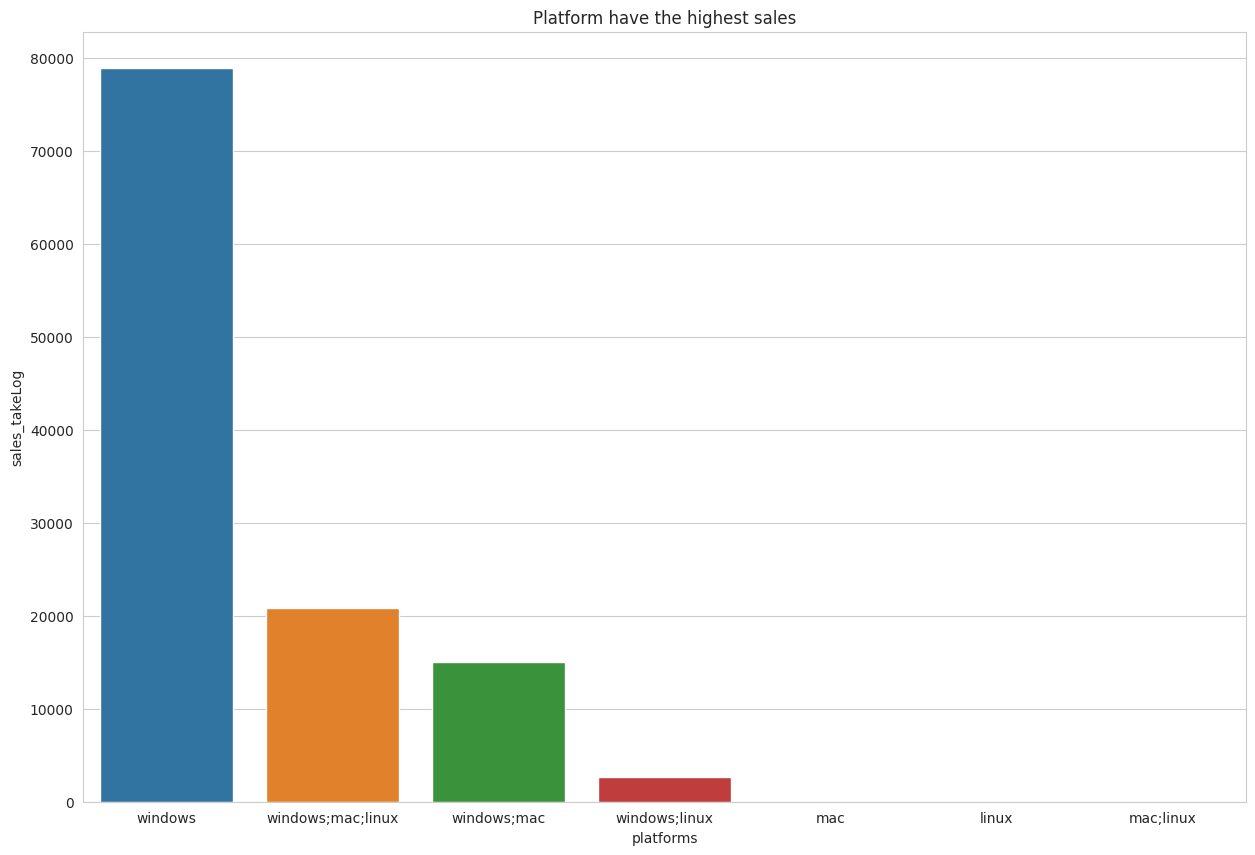

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Platform have the highest sales')
sns.barplot(x="platforms", y="sales_takeLog", data=data_platforms)

**Publisher have the highest sales**

In [ ]:
data_publisher = data.groupby(by=['publisher'])['sales_takeLog'].sum()
data_publisher = data_publisher.reset_index()
data_publisher = data_publisher.sort_values(by=['sales_takeLog'], ascending=False)

<Axes: title={'center': 'Publisher have the highest sales'}, xlabel='sales_takeLog', ylabel='publisher'>

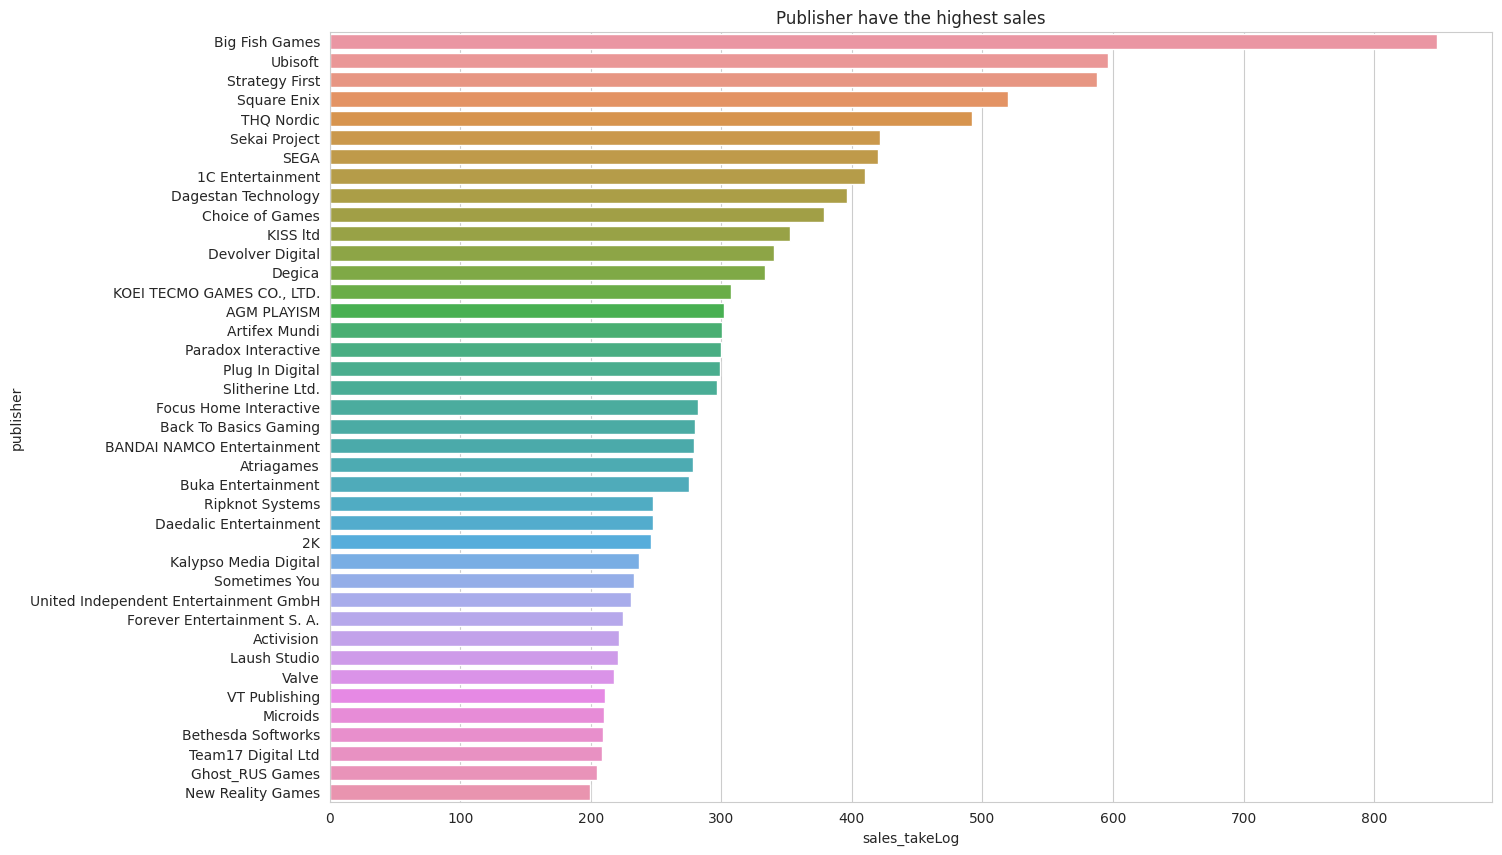

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Publisher have the highest sales')
sns.barplot(x="sales_takeLog", y="publisher", data=data_publisher.iloc[:40])

**Developer have the highest sales**

In [ ]:
data_developer = data.groupby(by=['developer'])['sales_takeLog'].sum()
data_developer = data_developer.reset_index()
data_developer = data_developer.sort_values(by=['sales_takeLog'], ascending=False)

<Axes: title={'center': 'Developer have the highest sales'}, xlabel='sales_takeLog', ylabel='developer'>

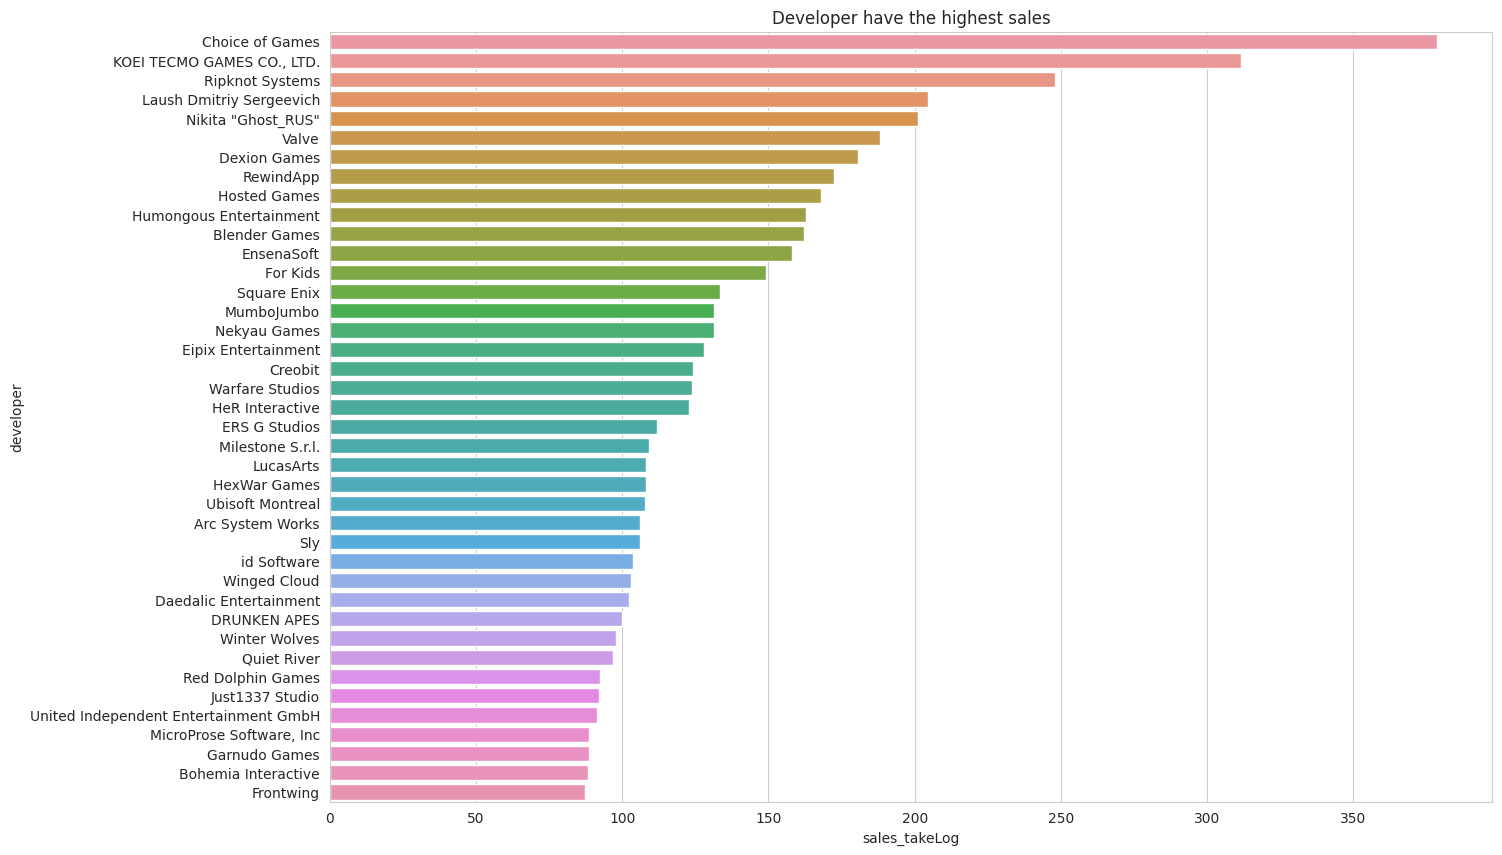

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Developer have the highest sales')
sns.barplot(x="sales_takeLog", y="developer", data=data_developer.iloc[:40])

**Outlier**

<Axes: title={'center': 'Median Playtime'}>

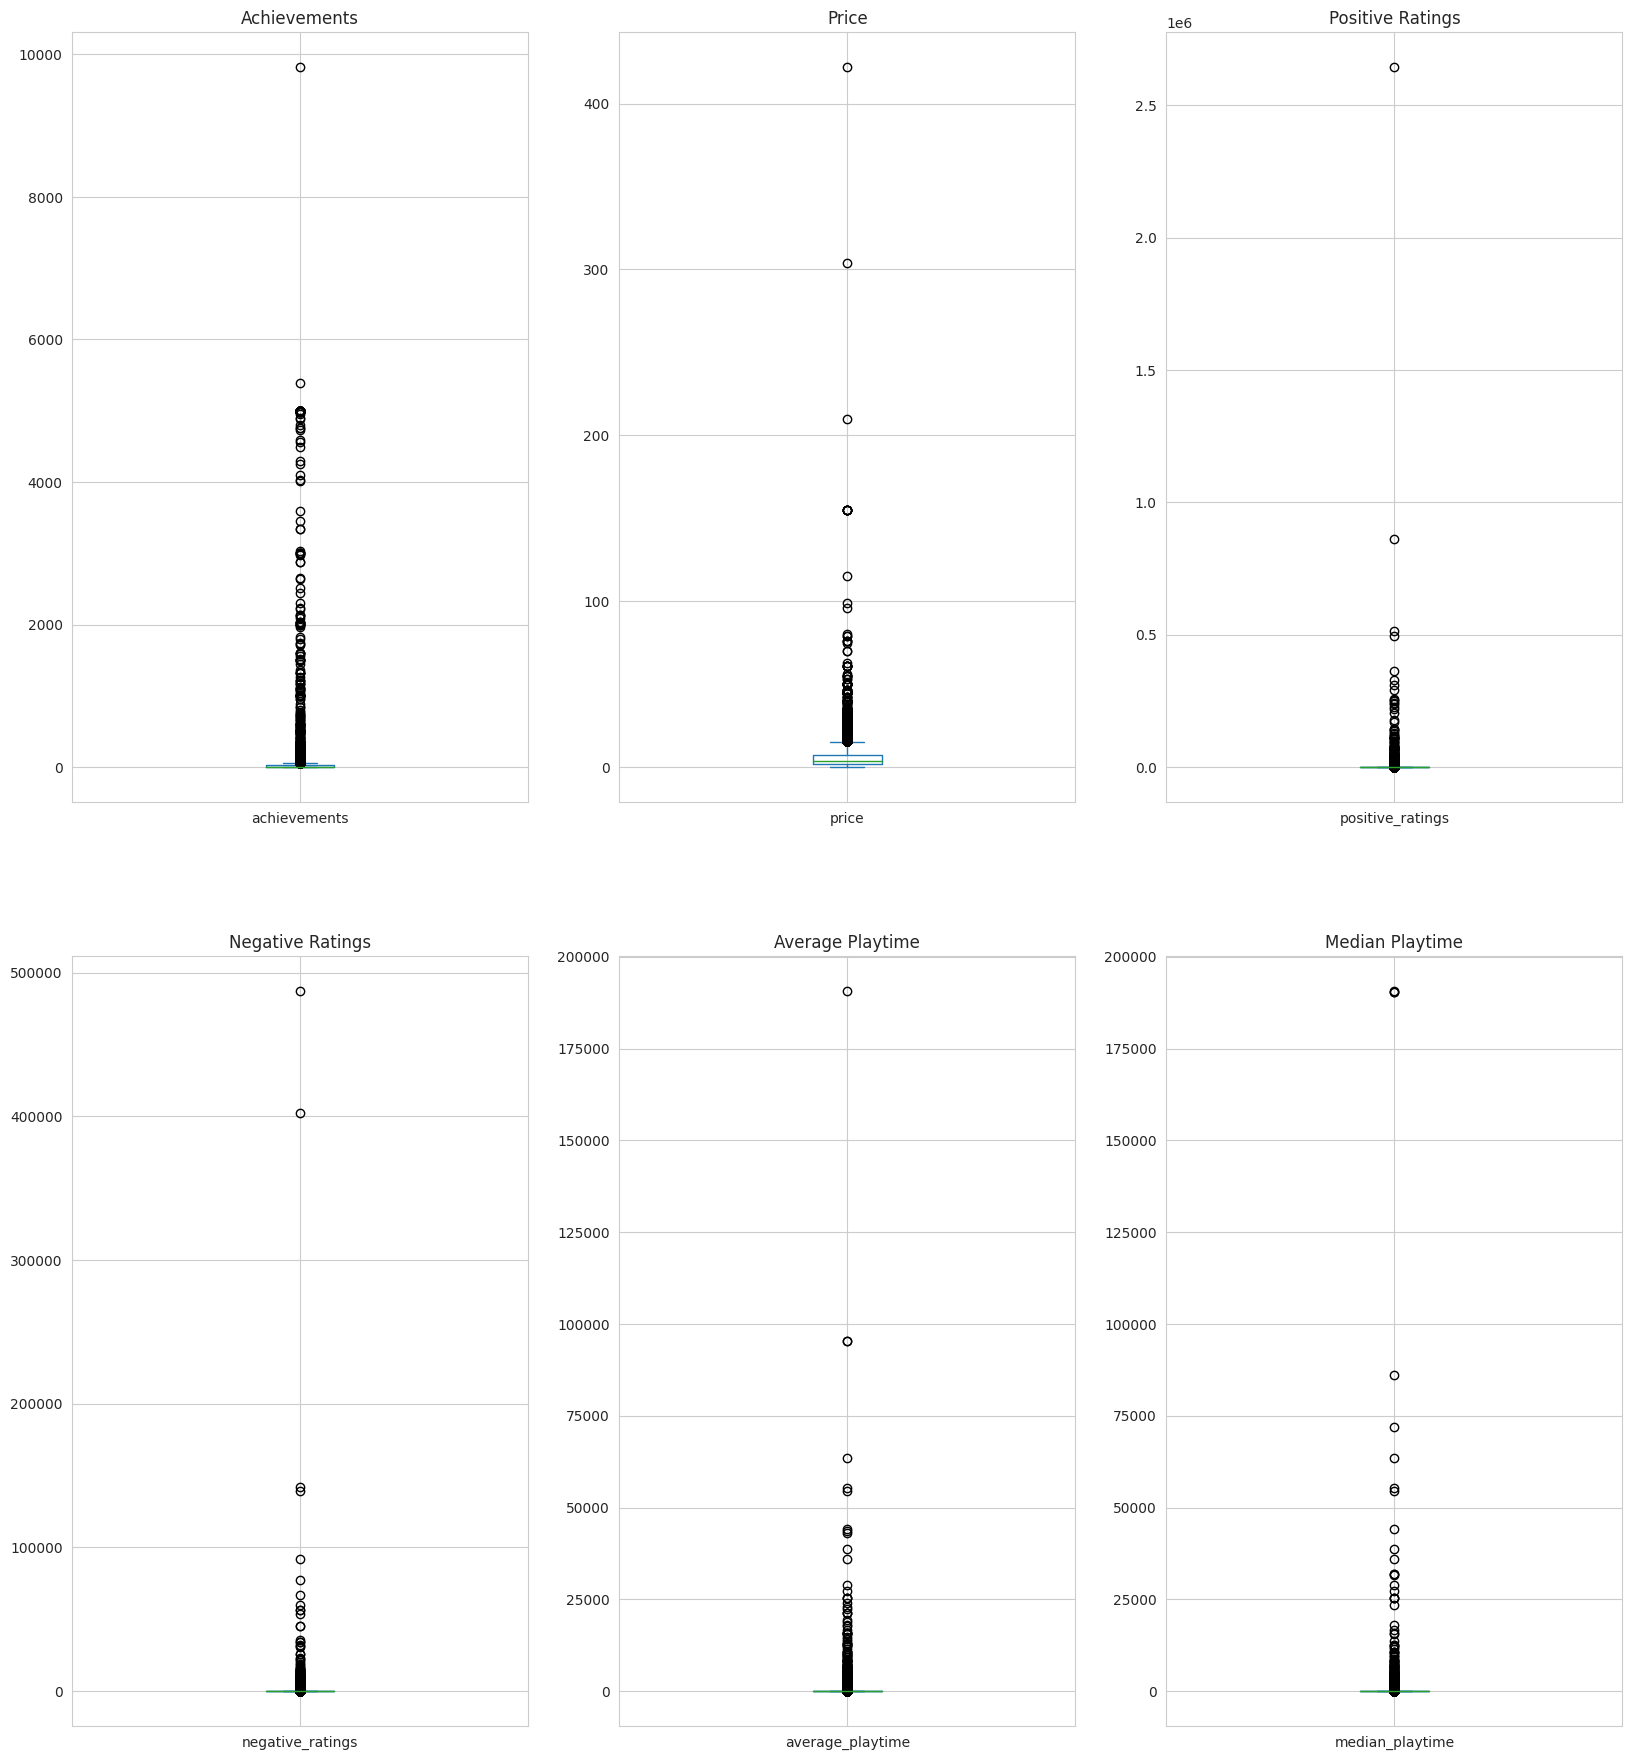

In [ ]:
plt.figure(figsize=(20, 22))

plt.subplot(2, 3, 1)
plt.title('Achievements')
data['achievements'].plot.box()

plt.subplot(2, 3, 2)
plt.title('Price')
data['price'].plot.box()

plt.subplot(2, 3, 3)
plt.title('Positive Ratings')
data['positive_ratings'].plot.box()

plt.subplot(2, 3, 4)
plt.title('Negative Ratings')
data['negative_ratings'].plot.box()

plt.subplot(2, 3, 5)
plt.title('Average Playtime')
data['average_playtime'].plot.box()

plt.subplot(2, 3, 6)
plt.title('Median Playtime')
data['median_playtime'].plot.box()

**Correlations**

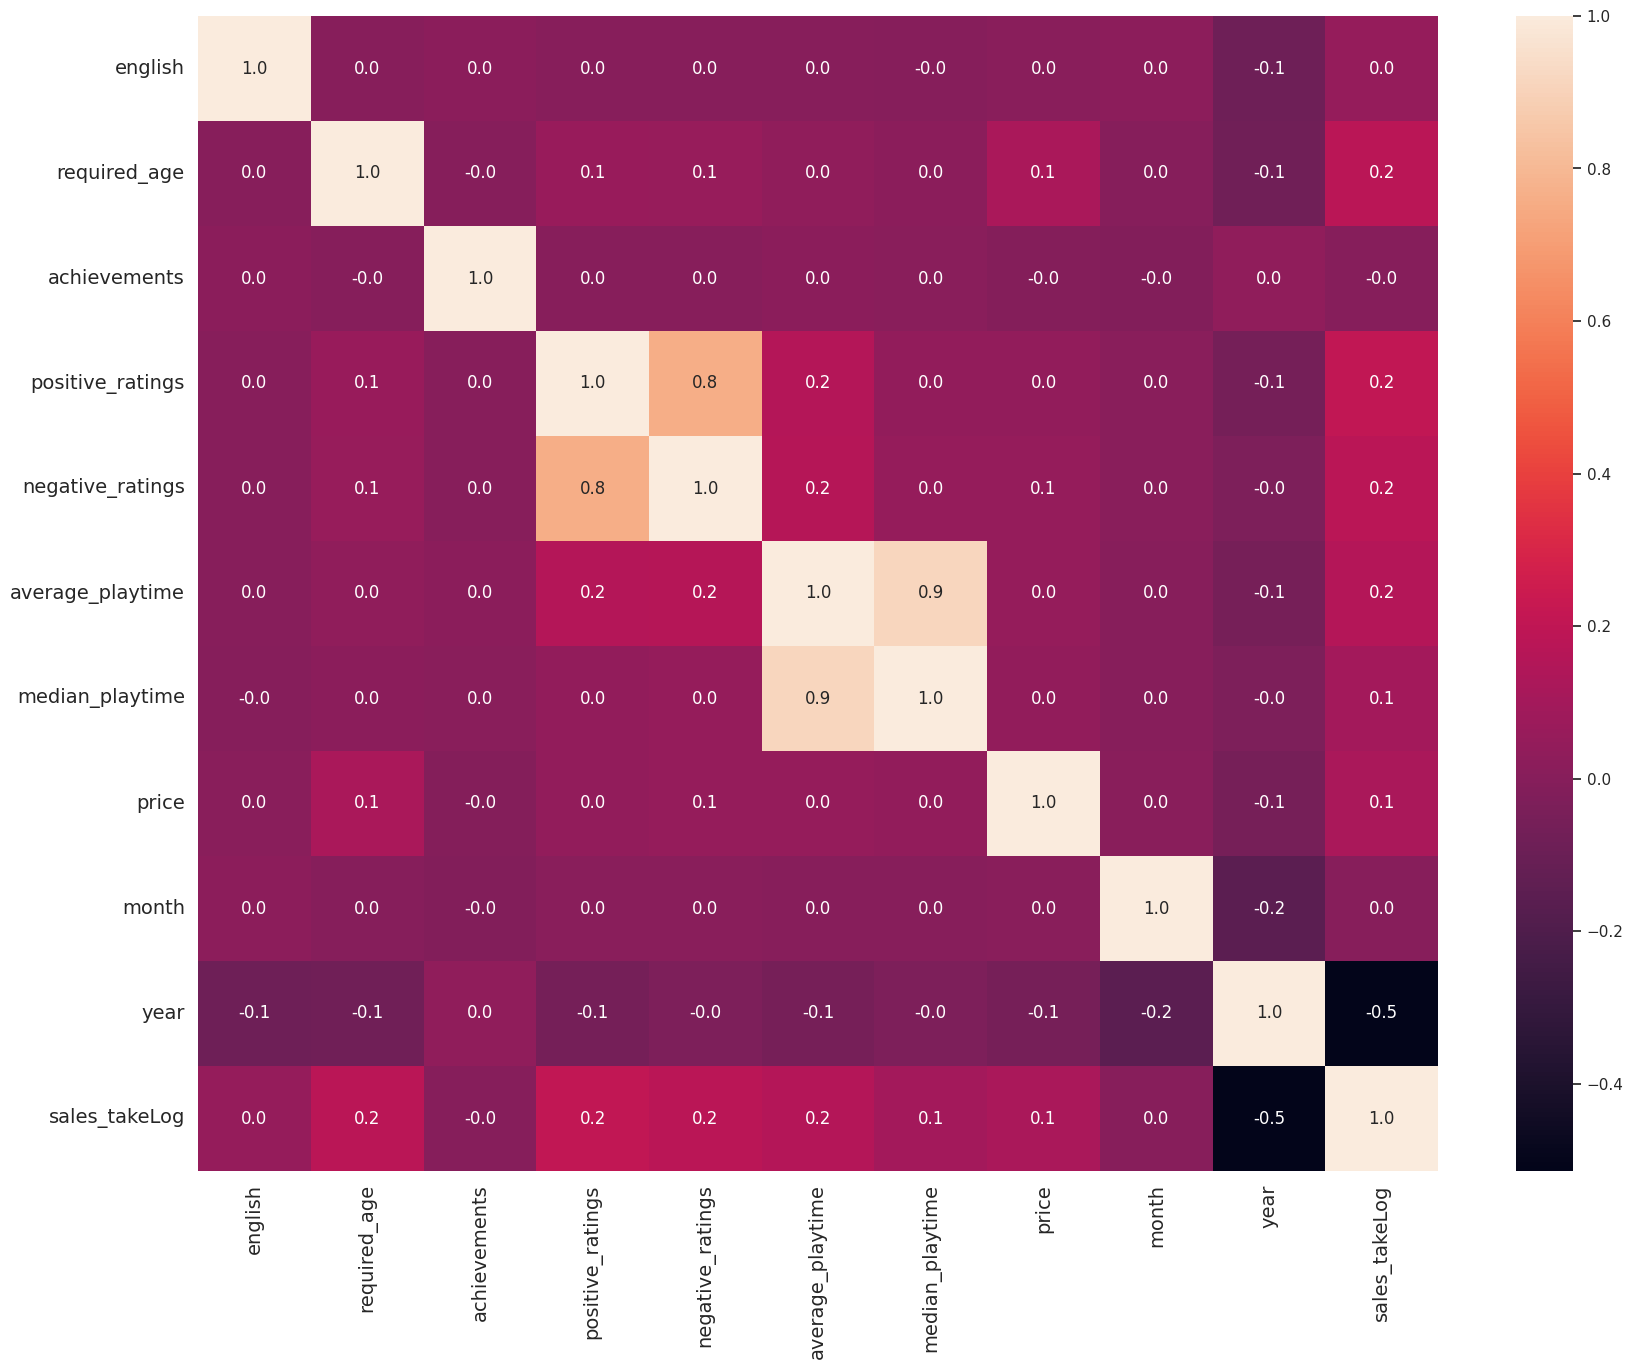

In [ ]:
plt.figure(figsize=(20, 15))
sns.set(font_scale=1)
sns.heatmap(data.corr(), annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Clean Data

**Drop Outlier**

In [ ]:
data[data['achievements'] > 5000]

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
12604,1,Sacada,Sacada,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Strategy,Casual;Strategy;Indie,9821,125,35,0,0,50000-100000,6.99,2,2017,4.875061
14735,1,Idea Cabin,Idea Cabin,windows;mac;linux,0,Single-player;Steam Achievements,Violent;Gore;Action;Casual;Indie;Early Access,Early Access;Action;Indie,5394,45,78,0,0,0-20000,1.59,6,2017,4.000000


In [ ]:
data = data[data['achievements'] <= 5000]

In [ ]:
data[data['price'] > 200]

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
10034,1,SideFX,SideFX,windows,0,Partial Controller Support;Steam Cloud,Animation & Modeling;Design & Illustration;Gam...,Animation & Modeling;Game Development;3D,0,23,0,0,0,0-20000,209.99,10,2018,4.0
13062,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Edu...,Game Development;Design & Illustration;Utilities,0,1,0,0,0,0-20000,303.99,3,2017,4.0
21105,1,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,windows,0,Single-player,Simulation,Simulation;Difficult,0,1,0,0,0,0-20000,421.99,4,2018,4.0


In [ ]:
data = data[data['price'] <= 200]

In [ ]:
data[data['positive_ratings'] > (0.6 * 1000000)]

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
22,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,10000000-200000000,0.0,7,2013,8.021189
25,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,10000000-200000000,0.0,8,2012,8.021189


In [ ]:
data = data[data['positive_ratings'] <= (0.6 * 1000000)]

In [ ]:
data[data['negative_ratings'] > 100000]

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
2478,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-200000000,24.99,4,2015,8.021189
12836,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,10000000-200000000,26.99,12,2017,8.021189


In [ ]:
data = data[data['negative_ratings'] <= 100000]

In [ ]:
data[data['average_playtime'] > 50000]

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
1478,1,Stoic,Versus Evil,windows;mac,0,Multi-player;Cross-Platform Multiplayer,Free to Play;Indie;RPG;Strategy,Free to Play;Strategy;RPG,42,569,202,95245,190489,200000-500000,0.00,2,2013,5.544068
3930,1,Wonderstruck,Square Enix,windows;mac,0,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Action;Adventure;Indie;Massively Multiplayer;RPG,Sandbox;Massively Multiplayer;Open World,59,1153,486,55204,55204,20000-50000,32.99,9,2018,4.544068
3969,1,Portalarium,Portalarium,windows;mac;linux,0,Single-player;Multi-player;MMO;Co-op;Cross-Pla...,Free to Play;Massively Multiplayer;RPG,RPG;Massively Multiplayer;Free to Play,29,1065,1017,54618,54618,50000-100000,0.00,3,2018,4.875061
6014,1,Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej,dosowisko.net,windows;linux,0,Single-player;Captions available;Steam Cloud,Adventure;Casual;Free to Play;Indie,Free to Play;Adventure;Indie,0,218,50,95242,190445,100000-200000,0.00,10,2015,5.176091
8969,1,YETU GAME,YETU GAME,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Puzzle;Free to Play;Anime,8,4198,233,63481,63490,200000-500000,0.00,9,2016,5.544068
9201,1,Manuel Pazos;Daniel Celemín,Manuel Pazos;Daniel Celemín,windows;mac;linux,0,Single-player,Adventure;Free to Play,Free to Play;Adventure;Retro,0,146,22,190625,190625,50000-100000,0.00,5,2016,4.875061


In [ ]:
data = data[data['average_playtime'] <= 50000]

In [ ]:
data[data['median_playtime'] > 50000]

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
2023,1,"SmiteWorks USA, LLC","SmiteWorks USA, LLC",windows;mac,0,Multi-player;Co-op;Cross-Platform Multiplayer,Indie;RPG;Strategy,RPG;Strategy;Software,0,377,100,43074,86148,20000-50000,29.99,5,2014,4.544068
23409,0,托更的修罗,托更的修罗,windows,0,Single-player,Casual;Indie;RPG;Simulation,Simulation;Indie;Casual,0,404,164,43632,71857,20000-50000,2.89,11,2018,4.544068


In [ ]:
data = data[data['median_playtime'] <= 50000]

In [ ]:
data.reset_index(inplace = True, drop = True)
data

,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,estimated_sales,price,month,year,sales_takeLog
0,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-200000000,7.19,11,2000,8.021189
1,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,4,1999,6.875061
2,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,5,2003,6.875061
3,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,6,2001,6.875061
4,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,11,1999,6.875061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,4,2019,4.000000
27054,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,4,2019,4.000000
27055,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,4,2019,4.000000
27056,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,4,2019,4.000000


# Preprocessing (Combine small amounts of data into one / Group Small Data)

In [ ]:
data = data.rename(str.capitalize, axis='columns')

**Drop columns have correlation to target is 0 that is not used.**

In [ ]:
data = data.drop(['English', 'Required_age'], axis=1)
data

,Developer,Publisher,Platforms,Categories,Genres,Steamspy_tags,Achievements,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Estimated_sales,Price,Month,Year,Sales_takelog
0,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-200000000,7.19,11,2000,8.021189
1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,4,1999,6.875061
2,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,5,2003,6.875061
3,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,6,2001,6.875061
4,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,11,1999,6.875061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,4,2019,4.000000
27054,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,4,2019,4.000000
27055,EntwicklerX,EntwicklerX,windows,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,4,2019,4.000000
27056,Yustas Game Studio,Alawar Entertainment,windows;mac,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,4,2019,4.000000


**Genres**

In [ ]:
genres_before = count_labels('Genres')
genres_before.value_counts()

Genres               
Indie                    19413
Action                   11897
Casual                   10205
Adventure                10026
Strategy                  5243
Simulation                5192
RPG                       4306
Early Access              2953
Free to Play              1698
Sports                    1322
Racing                    1024
Violent                    842
Massively Multiplayer      720
Gore                       536
Nudity                     266
Sexual Content             245
Utilities                  145
Design & Illustration       85
Animation & Modeling        77
Education                   50
Video Production            38
Software Training           30
Audio Production            29
Web Publishing              27
Game Development            15
Photo Editing               12
Accounting                   6
Tutorial                     1
Documentary                  1
dtype: int64

In [ ]:
pattern = '|'.join(['Accounting', 'Tutorial', 'Documentary'])
data["Genres"] = data["Genres"].str.replace(pattern, 'Other', case=True)

genres_after = count_labels('Genres')
genres_after.value_counts()

Genres               
Indie                    19413
Action                   11897
Casual                   10205
Adventure                10026
Strategy                  5243
Simulation                5192
RPG                       4306
Early Access              2953
Free to Play              1698
Sports                    1322
Racing                    1024
Violent                    842
Massively Multiplayer      720
Gore                       536
Nudity                     266
Sexual Content             245
Utilities                  145
Design & Illustration       85
Animation & Modeling        77
Education                   50
Video Production            38
Software Training           30
Audio Production            29
Web Publishing              27
Game Development            15
Photo Editing               12
Other                        8
dtype: int64

**Categories**

In [ ]:
categories_before = count_labels('Categories')
categories_before.value_counts()

Categories                
Single-player                 25669
Steam Achievements            14123
Steam Trading Cards            7913
Steam Cloud                    7216
Full controller support        5692
Partial Controller Support     4233
Multi-player                   3966
Steam Leaderboards             3438
Online Multi-Player            2485
Shared/Split Screen            2152
Stats                          1875
Co-op                          1717
Local Multi-Player             1615
Cross-Platform Multiplayer     1077
Online Co-op                   1070
Local Co-op                    1059
Includes level editor          1036
Steam Workshop                  895
Captions available              720
In-App Purchases                687
MMO                             419
VR Support                      231
Commentary available            144
Valve Anti-Cheat enabled         92
Steam Turn Notifications         63
SteamVR Collectibles             39
Includes Source SDK              35
M

In [ ]:
pattern = '|'.join([r'Mods\s.require\sHL2.', 'Mods'])
data["Categories"] = data["Categories"].str.replace(pattern, 'Other', case=True)

categories_after = count_labels('Categories')
categories_after.value_counts()

Categories                
Single-player                 25669
Steam Achievements            14123
Steam Trading Cards            7913
Steam Cloud                    7216
Full controller support        5692
Partial Controller Support     4233
Multi-player                   3966
Steam Leaderboards             3438
Online Multi-Player            2485
Shared/Split Screen            2152
Stats                          1875
Co-op                          1717
Local Multi-Player             1615
Cross-Platform Multiplayer     1077
Online Co-op                   1070
Local Co-op                    1059
Includes level editor          1036
Steam Workshop                  895
Captions available              720
In-App Purchases                687
MMO                             419
VR Support                      231
Commentary available            144
Valve Anti-Cheat enabled         92
Steam Turn Notifications         63
SteamVR Collectibles             39
Includes Source SDK              35
O

**Steamspy Tags**

In [ ]:
steamspy_tags_before = count_labels('Steamspy_tags')
steamspy_tags_before.value_counts()

Steamspy_tags                 
Indie                             16228
Action                            10320
Casual                             8203
Adventure                          7768
Strategy                           4169
                                  ...  
Investigation                         1
Cinematic                             1
Inventory Management                  1
Intentionally Awkward Controls        1
Logic                                 1
Length: 339, dtype: int64

In [ ]:
steamspy_tags_before_split = data["Steamspy_tags"].str.split(';', expand=True)
steamspy_tags_before_split.fillna("", inplace = True)
steamspy_tags_before_split

,0,1,2
0,Action,FPS,Multiplayer
1,Action,FPS,Multiplayer
2,FPS,World War II,Multiplayer
3,Action,FPS,Multiplayer
4,FPS,Action,Sci-fi
...,...,...,...
27053,Adventure,Indie,Casual
27054,Action,Indie,Adventure
27055,Action,Indie,Casual
27056,Indie,Casual,Adventure


In [ ]:
count_steamspy_tags = count_labels('Steamspy_tags')['Steamspy_tags'].value_counts()
small_steamspy_tags = count_steamspy_tags[count_steamspy_tags < 10].index.tolist()

for i in range(len(steamspy_tags_before_split.columns)):
  for x in small_steamspy_tags:
    steamspy_tags_before_split[i][steamspy_tags_before_split[i] == x] = (steamspy_tags_before_split[i][steamspy_tags_before_split[i] == x]).str.replace(x, 'Other', case=True)

In [ ]:
data["Steamspy_tags"] = steamspy_tags_before_split[0] + ';' + steamspy_tags_before_split[1] + ';' + steamspy_tags_before_split[2]

steamspy_tags_after = count_labels('Steamspy_tags')
steamspy_tags_after.value_counts()

Steamspy_tags        
Indie                    16228
Action                   10320
Casual                    8203
Adventure                 7768
Strategy                  4169
                         ...  
PvP                         10
Word Game                   10
Interactive Fiction         10
Sokoban                     10
Procedural Generation       10
Length: 202, dtype: int64

**Platforms**

In [ ]:
platforms_before = count_labels('Platforms')
platforms_before.value_counts()

Platforms
windows      27053
mac           8057
linux         5229
dtype: int64

**Publisher**

In [ ]:
publisher_before = count_labels('Publisher')
publisher_before.value_counts()

Publisher      
Big Fish Games     212
Strategy First     136
THQ Nordic         119
Ubisoft            114
Plug In Digital    111
                  ... 
Hopoo Games          1
Horizon Games        1
Horizon Hobby        1
Horizon Studio       1
수프림                  1
Length: 14344, dtype: int64

In [ ]:
# Replaces values ​​that contain only spaces/dash with Other.
data["Publisher"][data["Publisher"] == " "] = (data["Publisher"][data["Publisher"] == " "]).str.replace(" ", 'Other', case=True, regex=False)
data["Publisher"][data["Publisher"] == "-"] = (data["Publisher"][data["Publisher"] == "-"]).str.replace("-", 'Other', case=True, regex=False)

publisher_before_split = data["Publisher"].str.split(';', expand=True)
publisher_before_split_obj = publisher_before_split.select_dtypes(['object'])
publisher_before_split[publisher_before_split_obj.columns] = publisher_before_split_obj.apply(lambda x: x.str.strip())

publisher_before_split.fillna("", inplace = True)
publisher_before_split

,0,1,2,3,4
0,Valve,,,,
1,Valve,,,,
2,Valve,,,,
3,Valve,,,,
4,Valve,,,,
...,...,...,...,...,...
27053,SHEN JIAWEI,,,,
27054,BekkerDev Studio,,,,
27055,EntwicklerX,,,,
27056,Alawar Entertainment,,,,


In [ ]:
count_publisher = (count_labels('Publisher')['Publisher'].str.strip()).value_counts()
small_publisher = count_publisher[count_publisher < 6].index.tolist()

for i in range(len(publisher_before_split.columns)):
  for x in small_publisher:
    publisher_before_split[i][publisher_before_split[i] == x] = (publisher_before_split[i][publisher_before_split[i] == x]).str.replace(x, 'Other', case=True, regex=False)

In [ ]:
data["Publisher"] = publisher_before_split[0] + ';' + publisher_before_split[1] + ';' + publisher_before_split[2] + ';' + publisher_before_split[3] + ';' + publisher_before_split[4]

publisher_after = count_labels('Publisher')
publisher_after.value_counts()

Publisher            
                         107265
Other                     18184
Big Fish Games              213
Strategy First              136
THQ Nordic                  119
                          ...  
Tuomo's games                 6
Milkstone Studios             6
MobileFusion Apps Ltd         6
My.com                        6
IR Studio                     6
Length: 561, dtype: int64

**Developer**

In [ ]:
developer_before = count_labels('Developer')
developer_before.value_counts()

Developer                 
Choice of Games               94
KOEI TECMO GAMES CO., LTD.    75
Ripknot Systems               62
Nikita "Ghost_RUS"            51
Laush Dmitriy Sergeevich      51
                              ..
Hunter Tintera                 1
Hunters Game Dev               1
Hunterx                        1
Husky Operations               1
수프림                            1
Length: 17943, dtype: int64

In [ ]:
# Replaces values ​​that contain only spaces/dash with Other.
data["Developer"][data["Developer"] == " "] = (data["Developer"][data["Developer"] == " "]).str.replace(" ", 'Other', case=True, regex=False)
data["Developer"][data["Developer"] == "-"] = (data["Developer"][data["Developer"] == "-"]).str.replace("-", 'Other', case=True, regex=False)

developer_before_split = data["Developer"].str.split(';', expand=True)
developer_before_split_obj = developer_before_split.select_dtypes(['object'])
developer_before_split[developer_before_split_obj.columns] = developer_before_split_obj.apply(lambda x: x.str.strip())

developer_before_split.fillna("", inplace = True)
developer_before_split

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Valve,,,,,,,,,,,,,,
1,Valve,,,,,,,,,,,,,,
2,Valve,,,,,,,,,,,,,,
3,Valve,,,,,,,,,,,,,,
4,Gearbox Software,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,SHEN JIAWEI,,,,,,,,,,,,,,
27054,Semyon Maximov,,,,,,,,,,,,,,
27055,EntwicklerX,,,,,,,,,,,,,,
27056,Yustas Game Studio,,,,,,,,,,,,,,


In [ ]:
count_developer = (count_labels('Developer')['Developer'].str.strip()).value_counts()
small_developer = count_developer[count_developer < 6].index.tolist()

for i in range(len(developer_before_split.columns)):
  for x in small_developer:
    developer_before_split[i][developer_before_split[i] == x] = (developer_before_split[i][developer_before_split[i] == x]).str.replace(x, 'Other', case=True, regex=False)

In [ ]:
data['Developer'] = developer_before_split[0] + ';' + developer_before_split[1] + ';' + developer_before_split[2] + ';' + developer_before_split[3] + ';' + developer_before_split[4] + ';' + developer_before_split[5] + ';' + developer_before_split[6] + ';' + developer_before_split[7] + ';' + developer_before_split[8] + ';' + developer_before_split[9] + ';' + developer_before_split[10] + ';' + developer_before_split[11] + ';' + developer_before_split[12] + ';' + developer_before_split[13] + ';' + developer_before_split[14]

developer_after = count_labels('Developer')
developer_after.value_counts()

Developer                 
                              376568
Other                          23455
Choice of Games                   94
KOEI TECMO GAMES CO., LTD.        75
Ripknot Systems                   62
                               ...  
D1ONE                              6
Rumata Lab                         6
Cyanide Studios                    6
SaintHeiser                        6
RhinoGearz                         6
Length: 525, dtype: int64

# Preprocessing (One-Hot / Dummy)

**Map column Owners to 0-9**

In [ ]:
data["Estimated_sales"] = (data["Estimated_sales"].map({"0-20000":0, 
                                                        "20000-50000":1,
                                                        "50000-100000":2, 
                                                        "100000-200000":3,
                                                        "200000-500000":4,
                                                        "500000-1000000":5,
                                                        "1000000-2000000":6,
                                                        "2000000-5000000":7,
                                                        "5000000-10000000":8,
                                                        "10000000-200000000":9})).astype(np.int8)

**Genres**

In [ ]:
genres = (data['Genres'].str.get_dummies(sep = ';')).astype(np.int8)
genres.columns = ['Genres_' + str(col) for col in (genres.columns.str.strip())]
genres

,Genres_Action,Genres_Adventure,Genres_Animation & Modeling,Genres_Audio Production,Genres_Casual,Genres_Design & Illustration,Genres_Early Access,Genres_Education,Genres_Free to Play,Genres_Game Development,...,Genres_Racing,Genres_Sexual Content,Genres_Simulation,Genres_Software Training,Genres_Sports,Genres_Strategy,Genres_Utilities,Genres_Video Production,Genres_Violent,Genres_Web Publishing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27054,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27055,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27056,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Categories**

In [ ]:
categories = (data['Categories'].str.get_dummies(sep = ';')).astype(np.int8)
categories.columns = ['Categories_' + str(col) for col in (categories.columns.str.strip())]
categories

,Categories_Captions available,Categories_Co-op,Categories_Commentary available,Categories_Cross-Platform Multiplayer,Categories_Full controller support,Categories_In-App Purchases,Categories_Includes Source SDK,Categories_Includes level editor,Categories_Local Co-op,Categories_Local Multi-Player,...,Categories_Stats,Categories_Steam Achievements,Categories_Steam Cloud,Categories_Steam Leaderboards,Categories_Steam Trading Cards,Categories_Steam Turn Notifications,Categories_Steam Workshop,Categories_SteamVR Collectibles,Categories_VR Support,Categories_Valve Anti-Cheat enabled
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27055,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
27056,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**Steamspy Tags**

In [ ]:
steamspy_tags = (data['Steamspy_tags'].str.get_dummies(sep = ';')).astype(np.int8)
steamspy_tags.columns = ['Steamspy_tags_' + str(col) for col in (steamspy_tags.columns.str.strip())]
steamspy_tags

,Steamspy_tags_2D,Steamspy_tags_2D Fighter,Steamspy_tags_3D Platformer,Steamspy_tags_4 Player Local,Steamspy_tags_4X,Steamspy_tags_Action,Steamspy_tags_Action RPG,Steamspy_tags_Adventure,Steamspy_tags_Agriculture,Steamspy_tags_Animation & Modeling,...,Steamspy_tags_Visual Novel,Steamspy_tags_Walking Simulator,Steamspy_tags_War,Steamspy_tags_Wargame,Steamspy_tags_Warhammer 40K,Steamspy_tags_Western,Steamspy_tags_Word Game,Steamspy_tags_World War I,Steamspy_tags_World War II,Steamspy_tags_Zombies
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27054,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27055,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27056,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Platforms**

In [ ]:
platforms = (data['Platforms'].str.get_dummies(sep = ';').rename(str.capitalize, axis='columns')).astype(np.int8)
platforms.columns = ['Platforms_' + str(col) for col in (platforms.columns.str.strip())]
platforms

,Platforms_Linux,Platforms_Mac,Platforms_Windows
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
27053,0,0,1
27054,0,0,1
27055,0,0,1
27056,0,1,1


**Publisher**

In [ ]:
publisher = (data['Publisher'].str.get_dummies(sep = ';')).astype(np.int8)
publisher.columns = ['Publisher_' + str(col) for col in (publisher.columns.str.strip())]
publisher

,Publisher_!Lim studio,Publisher_0Cube,Publisher_10tons Ltd,Publisher_11 bit studios,Publisher_1C Entertainment,Publisher_1C-SoftClub,Publisher_2K,Publisher_2tainment GmbH,Publisher_3D Realms (Apogee Software),Publisher_505 Games,...,Publisher_stariy8419,Publisher_tengenstudio,Publisher_tinyBuild,Publisher_upjers,Publisher_vadimalexepta,Publisher_КиКо,Publisher_凝冰剑斩,Publisher_哈视奇科技,Publisher_橙光游戏,Publisher_轻文
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Developer**

In [ ]:
developer = (data['Developer'].str.get_dummies(sep = ';')).astype(np.int8)
developer.columns = ['Developer_' + str(col) for col in (developer.columns).str.strip()]
developer

,Developer_07th Expansion,Developer_10tons Ltd,Developer_11 bit studios,Developer_1C Entertainment,Developer_3D Realms (Apogee Software),Developer_3DDUO,Developer_ACE Team,Developer_AFBIK Studio,Developer_AMG GAMES,Developer_ARGames,...,Developer_rokapublish,Developer_roseVeRte,Developer_stariy8419,Developer_upjers,Developer_vadimalexepta,Developer_КиКо,Developer_凝冰剑斩,Developer_哈视奇科技,Developer_橘子班,Developer_橙光游戏
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Drop unused columns**

In [ ]:
data = data.drop(['Sales_takelog', 'Developer', 'Publisher', 'Platforms', 'Categories', 'Genres', 'Steamspy_tags'], axis=1)
data = pd.concat([data, genres, categories, steamspy_tags, platforms, publisher, developer], axis=1)
data

,Achievements,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Estimated_sales,Price,Month,Year,Genres_Action,...,Developer_rokapublish,Developer_roseVeRte,Developer_stariy8419,Developer_upjers,Developer_vadimalexepta,Developer_КиКо,Developer_凝冰剑斩,Developer_哈视奇科技,Developer_橘子班,Developer_橙光游戏
0,0,124534,3339,17612,317,9,7.19,11,2000,1,...,0,0,0,0,0,0,0,0,0,0
1,0,3318,633,277,62,8,3.99,4,1999,1,...,0,0,0,0,0,0,0,0,0,0
2,0,3416,398,187,34,8,3.99,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1273,267,258,184,8,3.99,6,2001,1,...,0,0,0,0,0,0,0,0,0,0
4,0,5250,288,624,415,8,3.99,11,1999,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053,7,3,0,0,0,0,2.09,4,2019,0,...,0,0,0,0,0,0,0,0,0,0
27054,0,8,1,0,0,0,1.69,4,2019,1,...,0,0,0,0,0,0,0,0,0,0
27055,24,0,1,0,0,0,3.99,4,2019,1,...,0,0,0,0,0,0,0,0,0,0
27056,0,2,0,0,0,0,5.19,4,2019,0,...,0,0,0,0,0,0,0,0,0,0


# Save proprocess data

In [ ]:
pickle.dump(data, open('/content/drive/MyDrive/CP499_INDIVIDUAL_COMPUTER_PROJECT_II/data/proprocess_pc_game_data.pkl', 'wb'))